In [51]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import zscore
from scipy.stats import sem
from scipy.stats import linregress

# Connecting to Mongdo Database/Setup Dataframes

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# confirm that our new database was created
pprint(mongo.list_database_names())


['admin',
 'autosaurus',
 'classDB',
 'config',
 'epa',
 'fruits_db',
 'local',
 'met',
 'petsitly_marketing',
 'project3',
 'uk_food']


In [4]:
db = mongo['project3']

In [5]:
print(db.list_collection_names())

['emissions', 'gdp', 'population', 'agriculture', 'pesticides']


In [6]:
emissions = db['emissions']
gdp = db['gdp']
population = db['population']
agriculture = db['agriculture']
pesticides = db['pesticides']

In [7]:
#Grabbing each collection into a giant DataFrame
emi_docu = emissions.find()
emi_list = list(emi_docu)
emi_df = pd.DataFrame(emi_list)

gdp_docu = gdp.find()
gdp_list = list(gdp_docu)
gdp_df = pd.DataFrame(gdp_list)

pop_docu =population.find()
pop_list = list(pop_docu)
pop_df = pd.DataFrame(pop_list)

agr_docu = agriculture.find()
agr_list = list(agr_docu)
agr_df = pd.DataFrame(agr_list)

pest_docu = pesticides.find()
pest_list = list(pest_docu)
pest_df = pd.DataFrame(pest_list)

print(emi_df.columns)
print(gdp_df.columns)
print(pop_df.columns)
print(agr_df.columns)
print(pest_df.columns)

Index(['_id', 'Code', 'Country', 'Year', 'CO2_Emissions'], dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'GDP', 'Ag_perc_GDP', 'Agri_GDP'], dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'Population'], dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha'],
      dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'Total_Pesticides'], dtype='object')


In [9]:
#Merge all dataframes
complete_df = pd.merge(emi_df, gdp_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id_x', '_id_y'])

complete_df = pd.merge(complete_df, pop_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id'])

complete_df = pd.merge(complete_df, agr_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id'])

complete_df = pd.merge(complete_df, pest_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id'])

complete_df         

Code   Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
0     ALB   Albania  1996    1940.000000  1.506738e+10     0.364109   
1     ALB   Albania  1997    1470.000000  1.407231e+10     0.315434   
2     ALB   Albania  1998    1790.000000  1.553170e+10     0.287857   
3     ALB   Albania  1999    2970.000000  1.652540e+10     0.259187   
4     ALB   Albania  2000    3170.000000  1.663327e+10     0.245154   
...   ...       ...   ...            ...           ...          ...   
3931  ZWE  Zimbabwe  2015   12430.000305  3.979864e+10     0.082842   
3932  ZWE  Zimbabwe  2016   11020.000458  4.096319e+10     0.078740   
3933  ZWE  Zimbabwe  2017   10340.000153  4.431674e+10     0.083410   
3934  ZWE  Zimbabwe  2018   12380.000114  4.342090e+10     0.073194   
3935  ZWE  Zimbabwe  2019   11760.000229  4.082657e+10     0.098193   

          Agri_GDP  Population  Total_Land_sq_km  Ag_perc_land  \
0     5.486161e+09     3245681           27400.0     41.277372   
1     4.438891e+09     3229665           27400.0     41.423358   
2     4.470902e+09     3210133           27400.0     41.569343   
3     4.283176e+09     3188596           27400.0     41.788321   
4     4.077715e+09     3166147           27400.0     41.751825   
...            ...         ...               ...           ...   
3931  3.297018e+09    14399009          386850.0     41.876696   
3932  3.225436e+09    14600297          386850.0     41.876696   
3933  3.696446e+09    14812484          386850.0     41.876696   
3934  3.178138e+09    15034457          386850.0     41.876696   
3935  4.008868e+09    15271377          386850.0     41.876696   

      Agri_Land_sq_km  Total_Crop_Yield_t_ha  Total_Pesticides  
0           1131000.0             854.895696            262.40  
1           1135000.0             847.477792            273.79  
2           1139000.0             850.488892            285.19  
3           1145000.0             838.611694            296.59  
4           1144000.0             853.764694            307.98  
...               ...                    ...               ...  
3931       16200000.0             775.884894           2185.07  
3932       16200000.0             777.129893           2185.07  
3933       16200000.0             774.345388           2185.07  
3934       16200000.0             780.655493           2185.07  
3935       16200000.0             777.940795           2185.07  

[3936 rows x 13 columns]

In [107]:
complete_df['Country'].nunique()

145

# Preliminary Visuals of Data

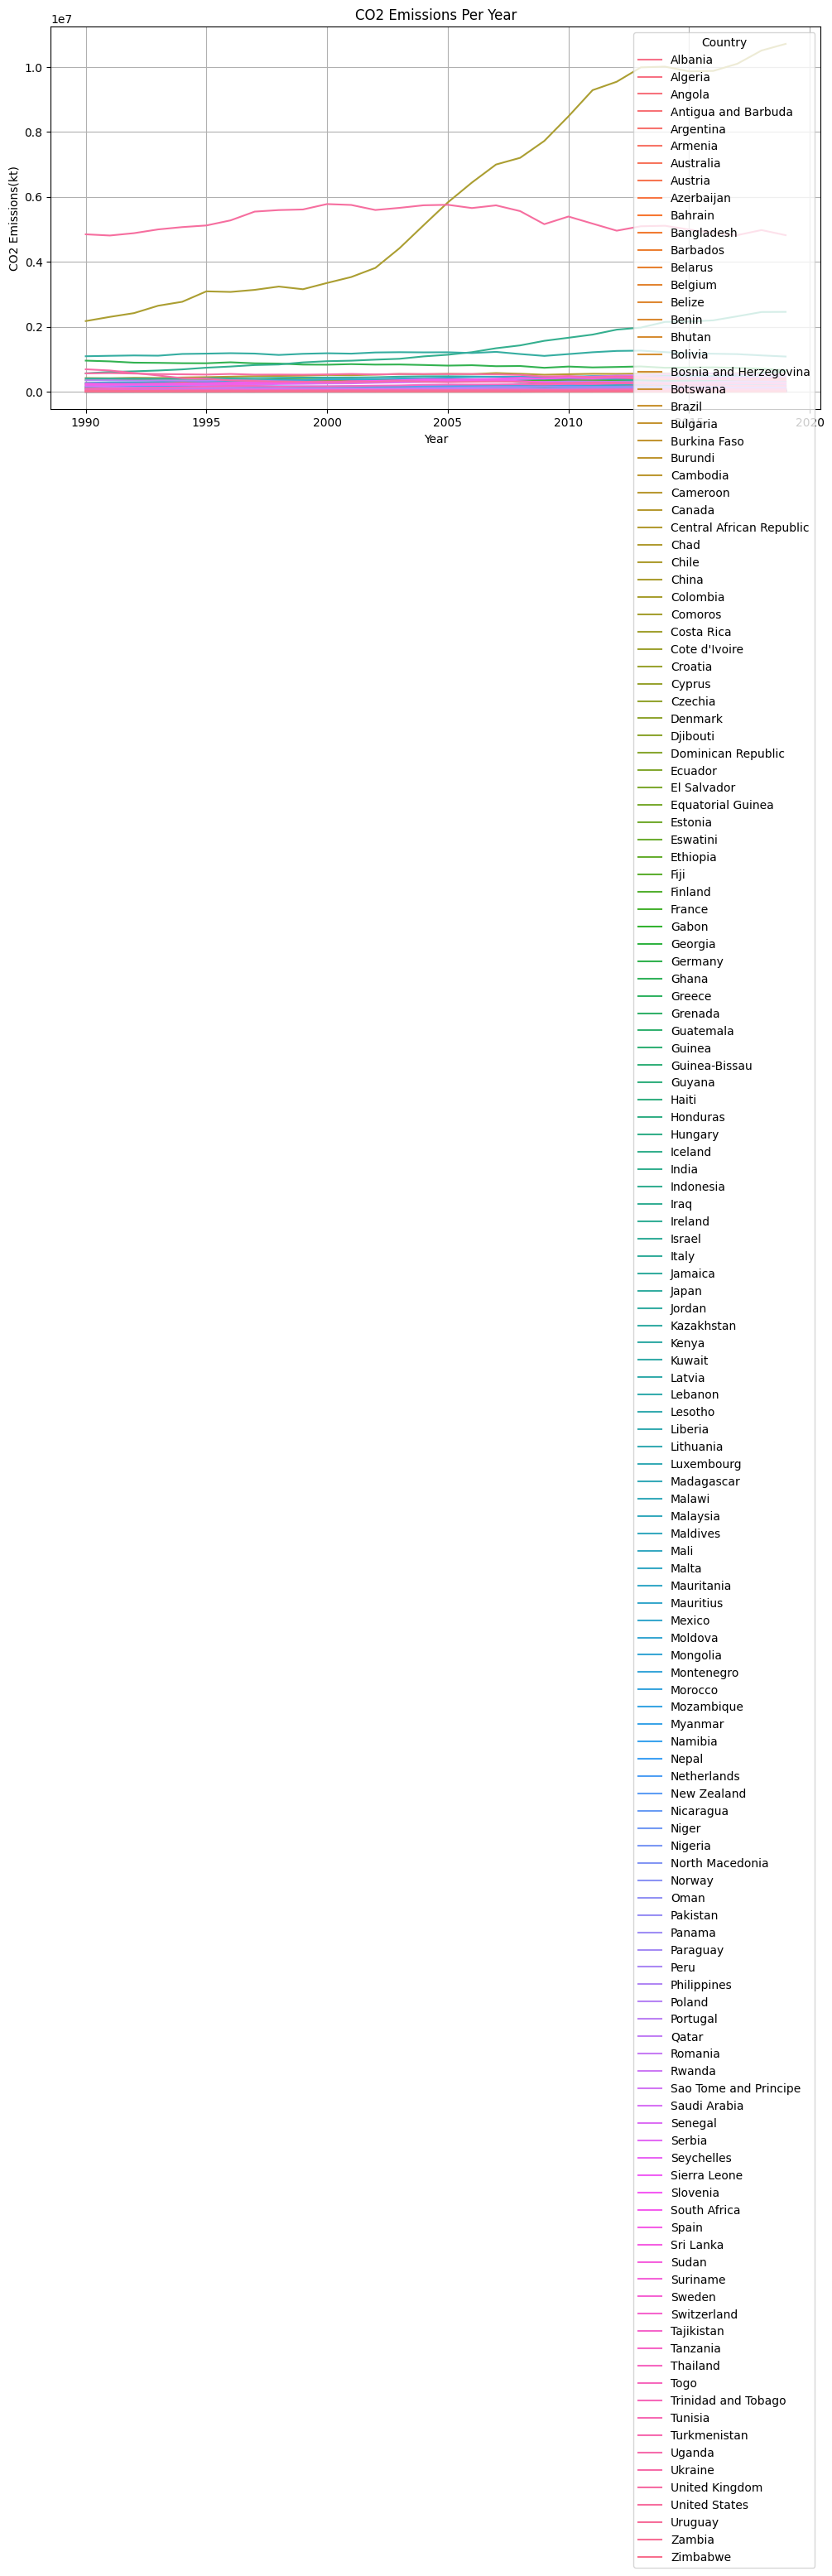

In [10]:
#Plotting emissions by country
plt.figure(figsize=(12,6))
sns.lineplot(data=emi_df, x='Year', y='CO2_Emissions', hue='Country')

plt.title('CO2 Emissions Per Year')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions(kt)')
plt.legend(title='Country')
plt.grid(True)

plt.show()

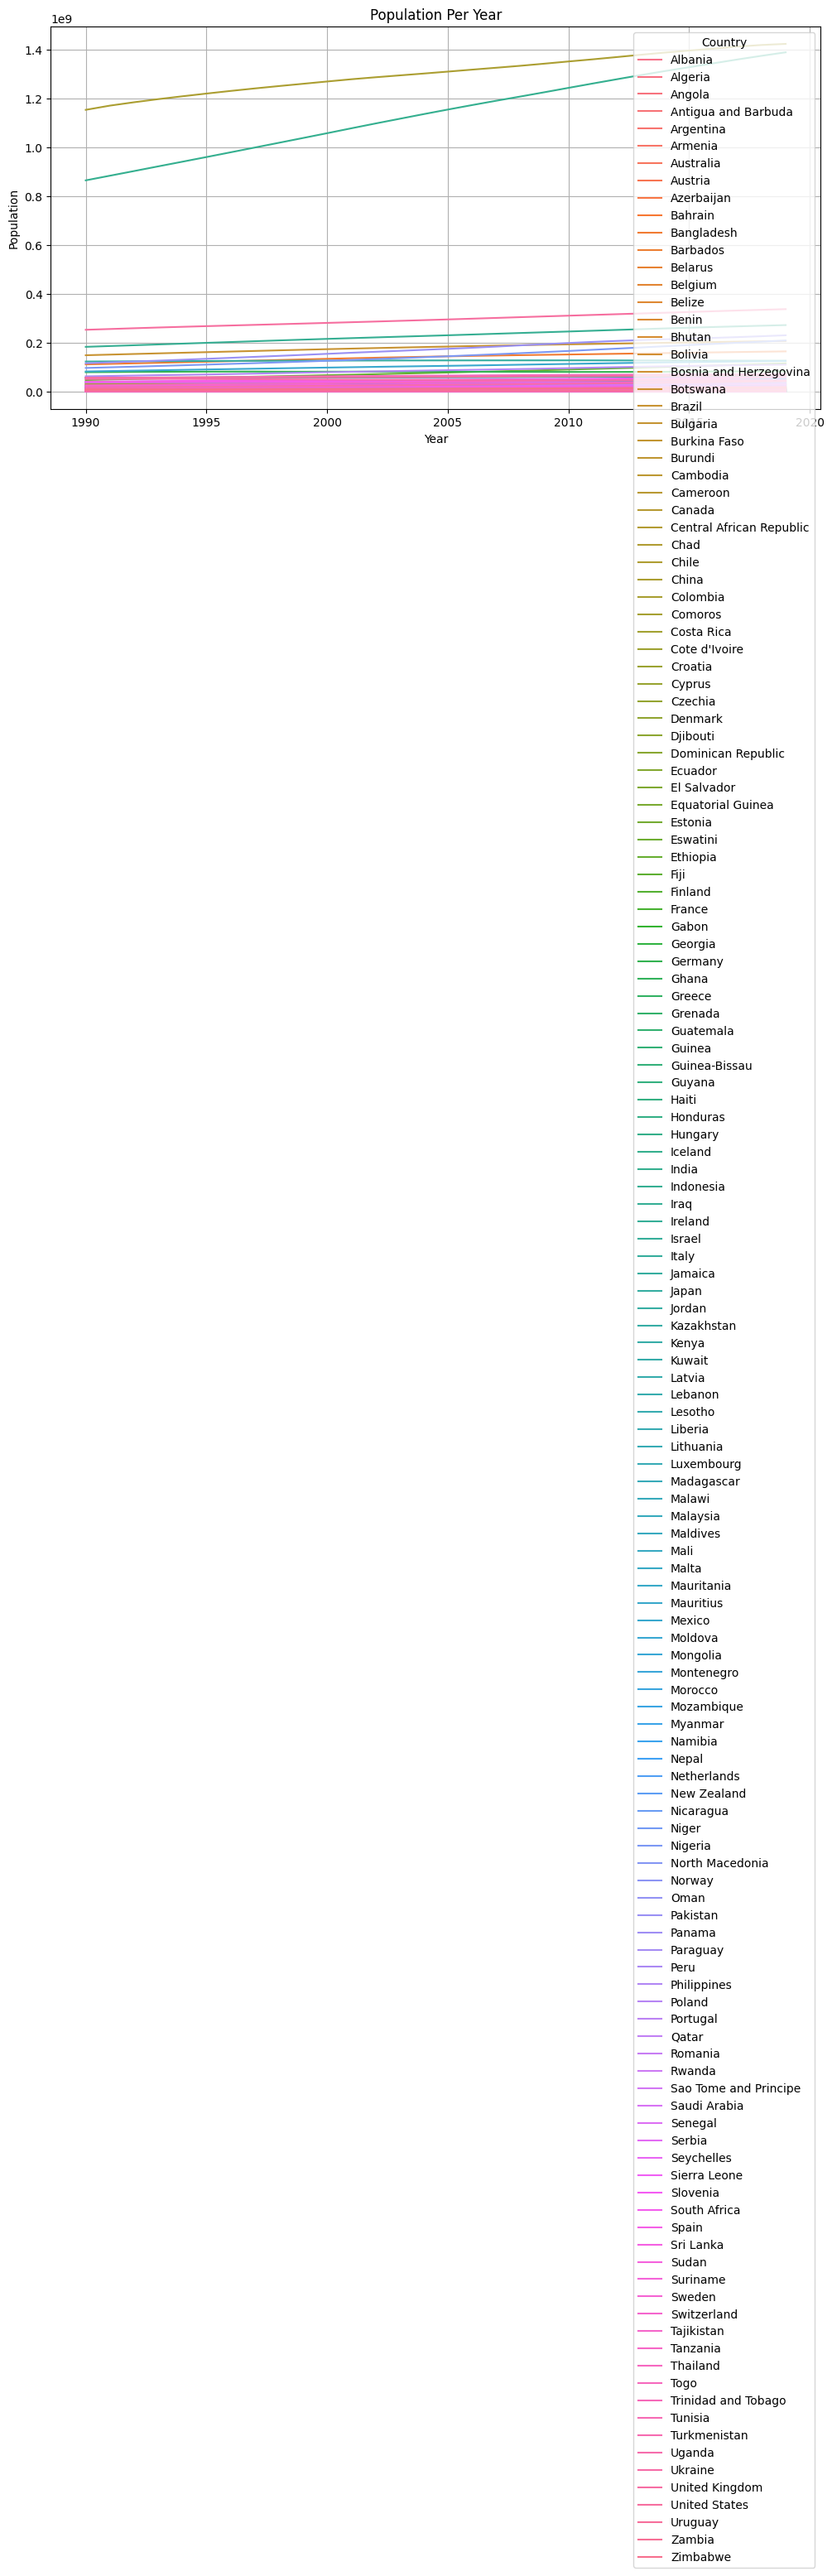

In [11]:
#Plotting population by country
plt.figure(figsize=(12,6))
sns.lineplot(data=pop_df, x='Year', y='Population', hue='Country')

plt.title('Population Per Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.grid(True)

plt.show()

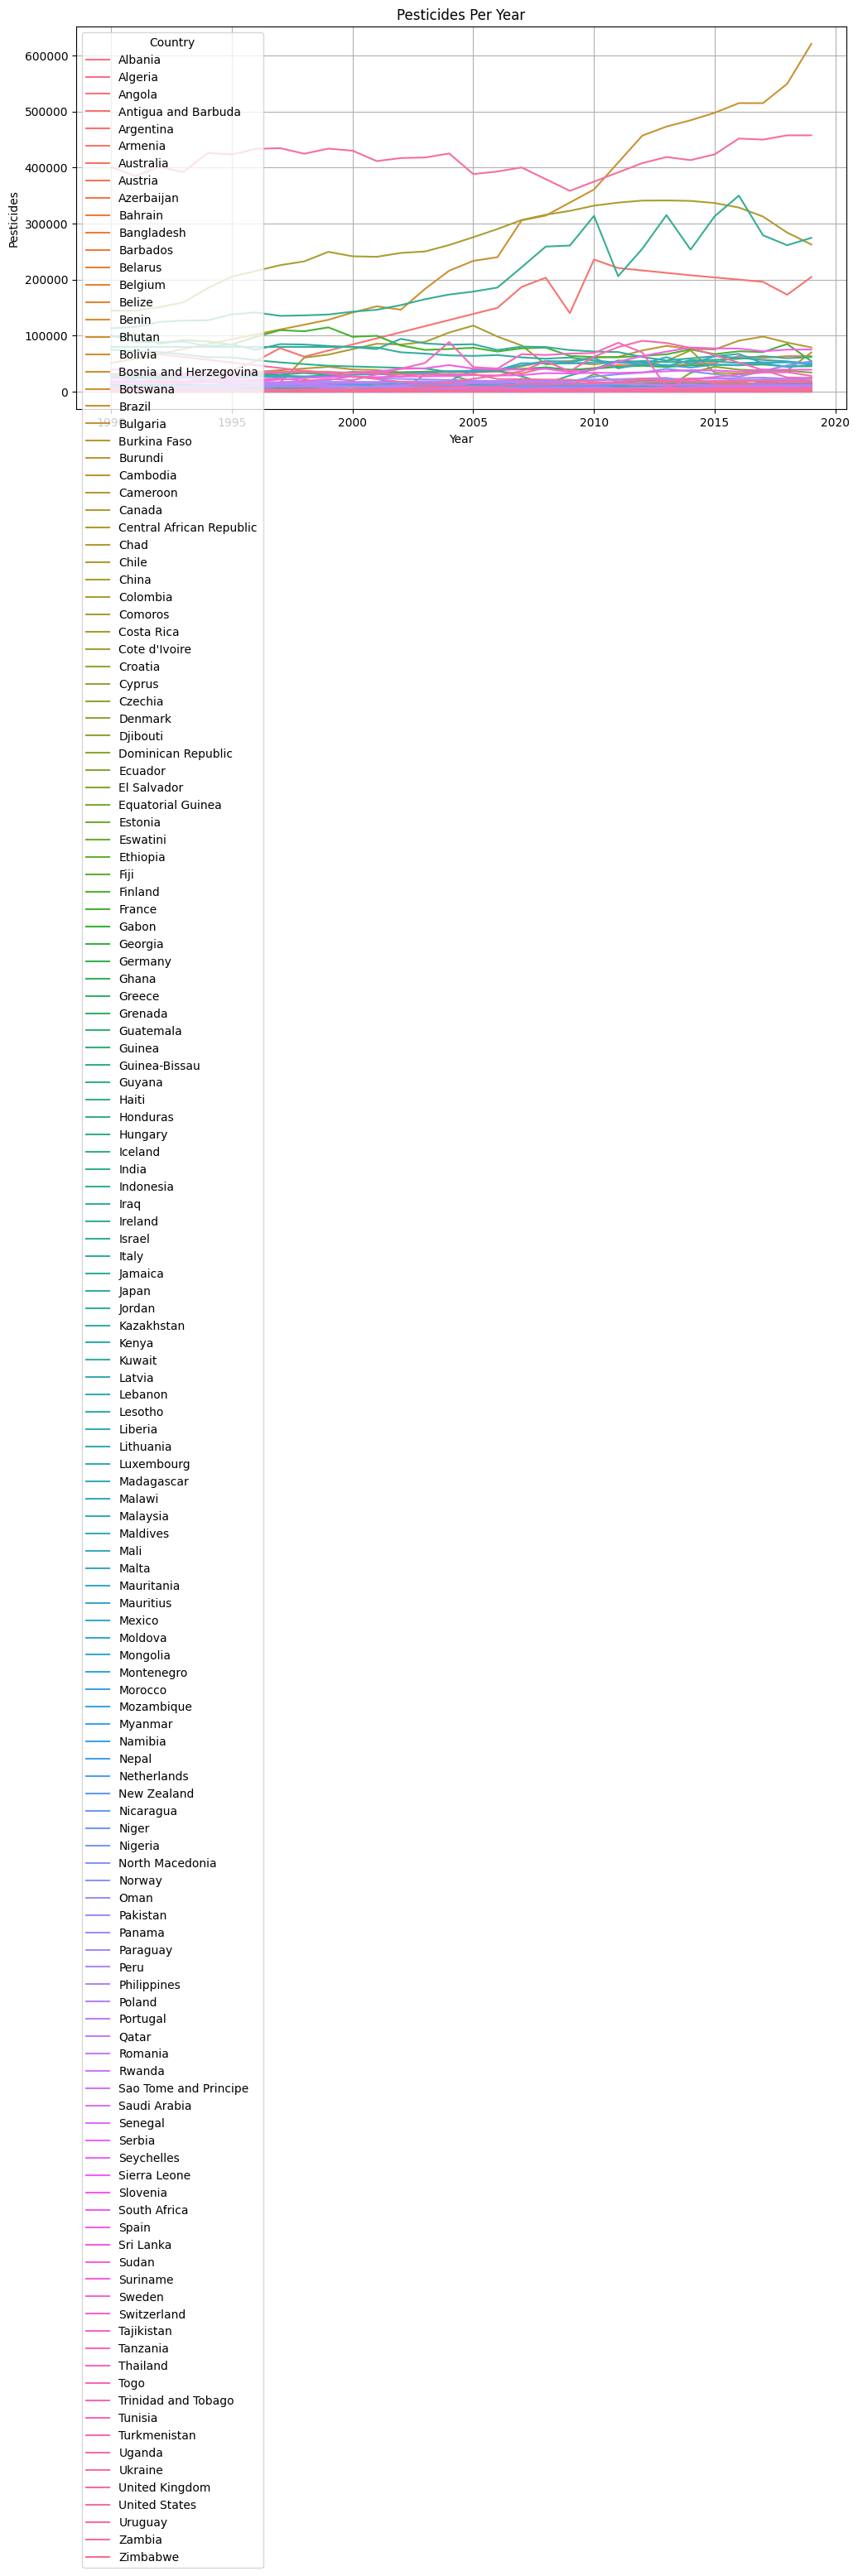

In [12]:
#Plotting pesticides by country
plt.figure(figsize=(12,6))
sns.lineplot(data=pest_df, x='Year', y='Total_Pesticides', hue='Country')

plt.title('Pesticides Per Year')
plt.xlabel('Year')
plt.ylabel('Pesticides')
plt.legend(title='Country')
plt.grid(True)

plt.show()

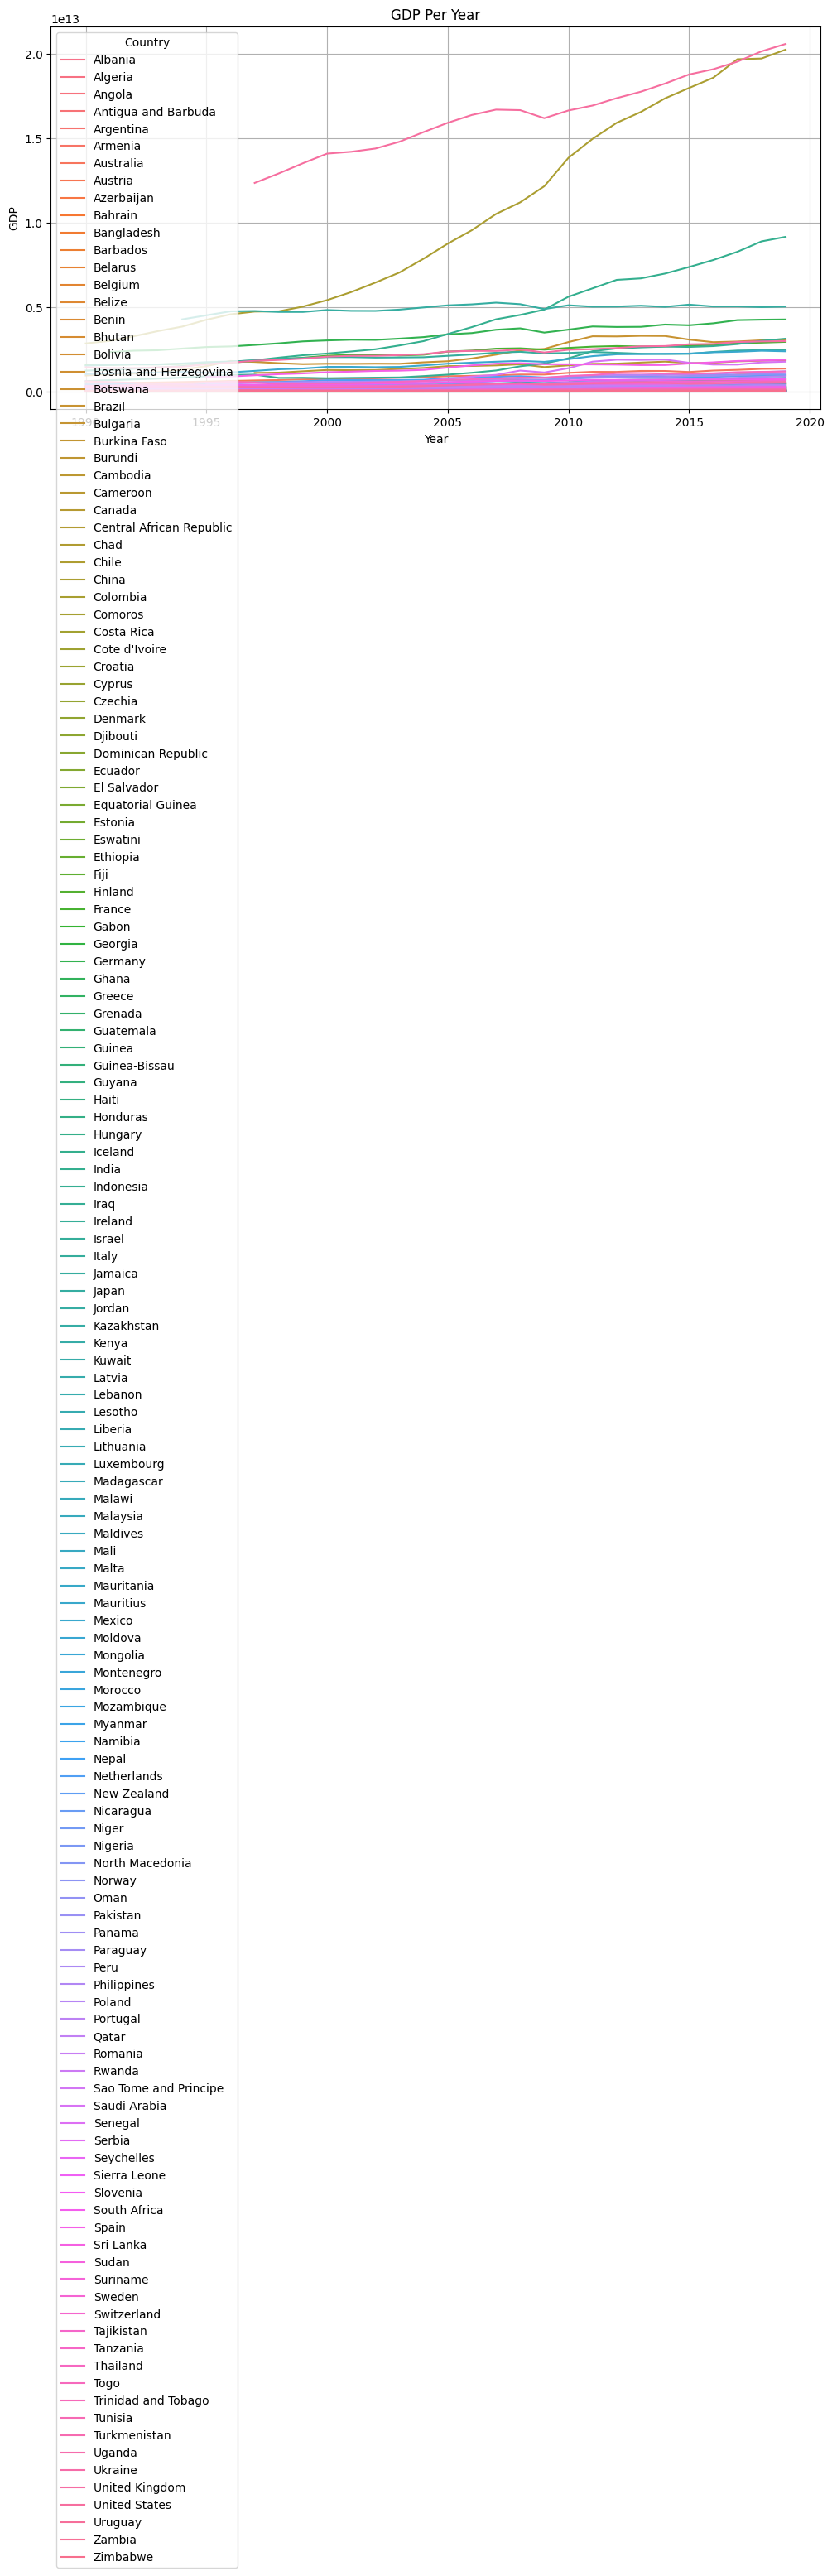

In [13]:
#Plotting gdp by country
plt.figure(figsize=(12,6))
sns.lineplot(data=gdp_df, x='Year', y='GDP', hue='Country')

plt.title('GDP Per Year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

plt.show()

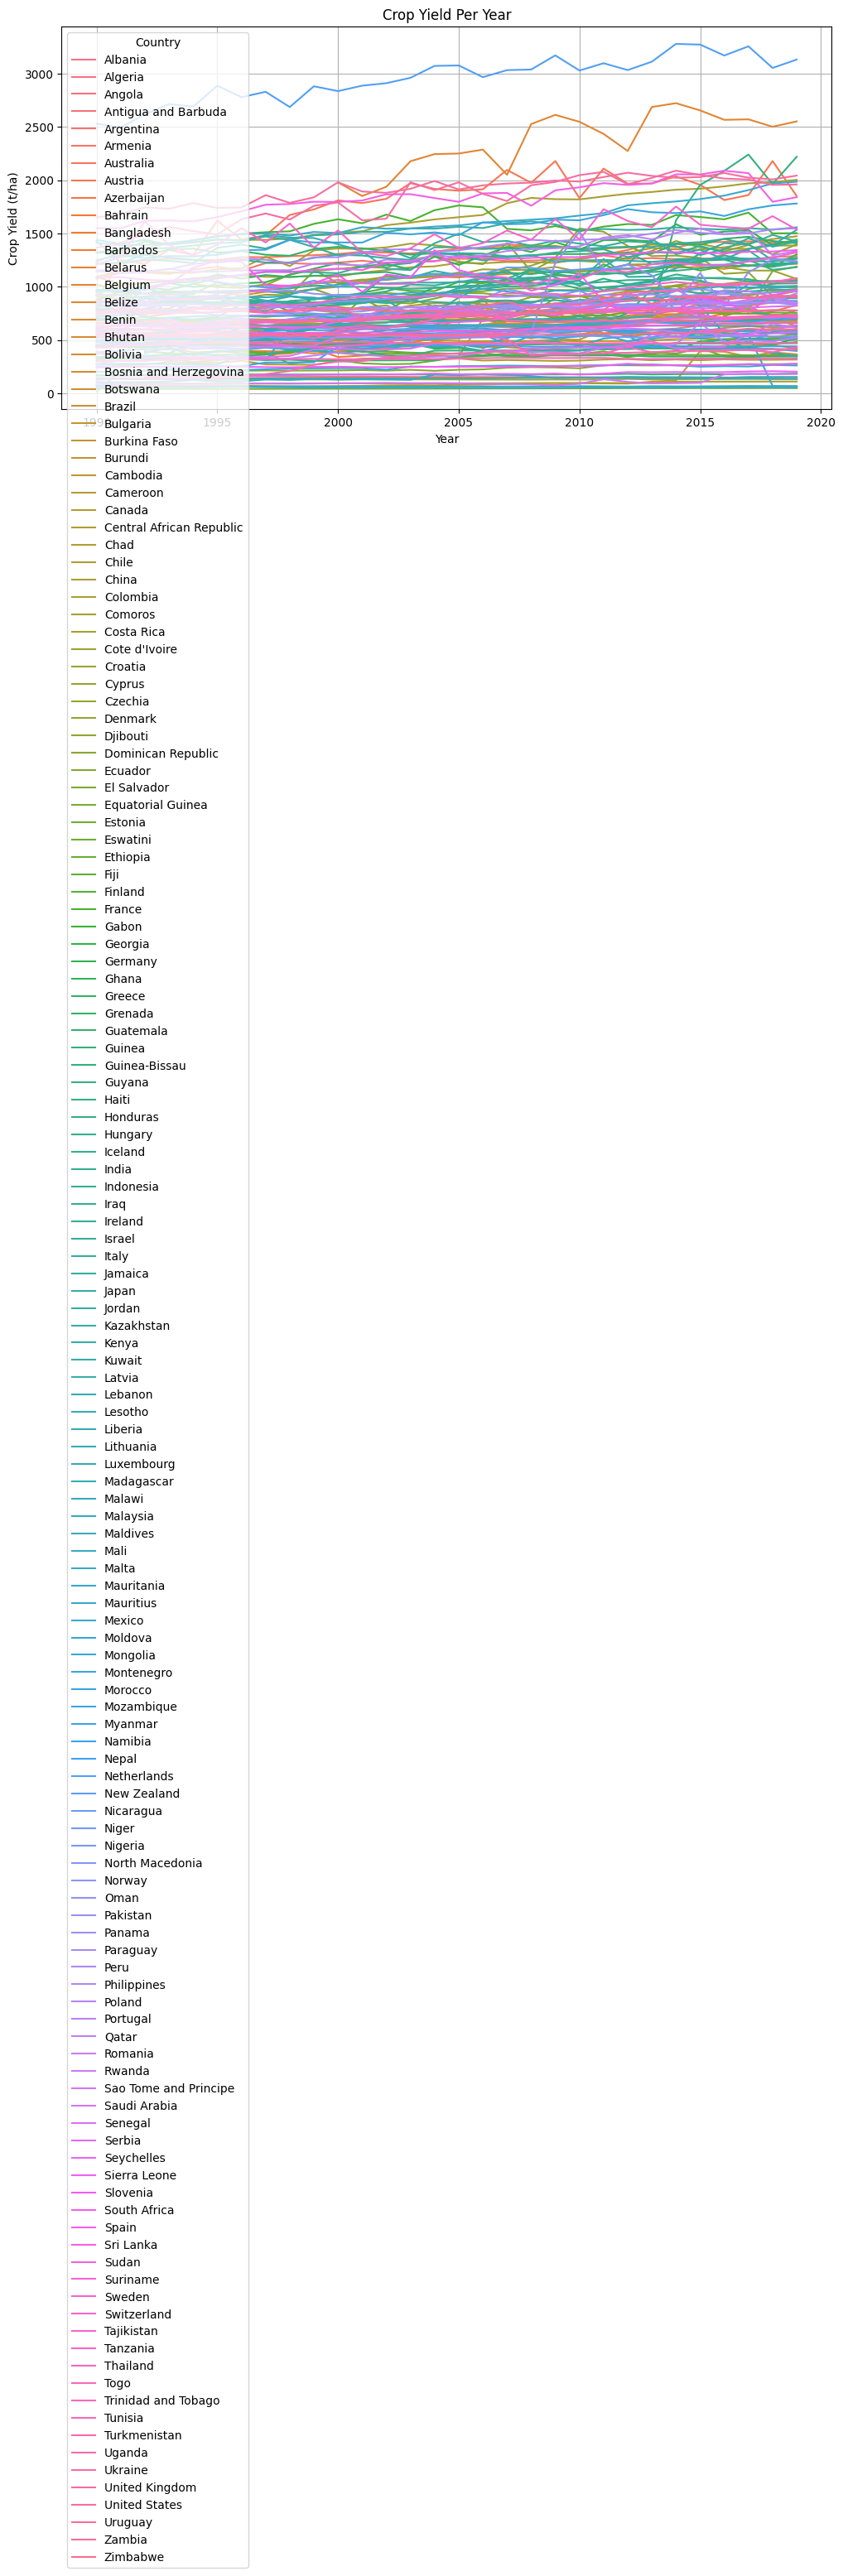

In [14]:
#Plotting crop yield by country
plt.figure(figsize=(12,6))
sns.lineplot(data=agr_df, x='Year', y='Total_Crop_Yield_t_ha', hue='Country')

plt.title('Crop Yield Per Year')
plt.xlabel('Year')
plt.ylabel('Crop Yield (t/ha)')
plt.legend(title='Country')
plt.grid(True)

plt.show()

# Searching for Outliers

In [15]:
complete_df.columns

Index(['Code', 'Country', 'Year', 'CO2_Emissions', 'GDP', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides'],
      dtype='object')

In [16]:
import pandas as pd
from scipy.stats import zscore


def find_outliers(df, column_name, threshold=3):
    # Calculate Z-scores for the specified column
    df['Z-Score'] = zscore(df[column_name], nan_policy='omit')

    # Identify rows with Z-scores that exceed the threshold
    df['Is-Outlier'] = df['Z-Score'].abs() > threshold

    # Isolate outlier rows
    outliers_df = df[df['Is-Outlier']]

    return outliers_df



In [17]:
# Specify the column for which to calculate Z-scores and find outliers
column_name = ['CO2_Emissions', 'GDP', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
for name in column_name:
    holder = name
    # Find and isolate outliers
    outliers = find_outliers(complete_df, name)
    print(f'Outliers for {name}: {outliers}')
    



Outliers for CO2_Emissions:      Code        Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
796   CHN          China  1992   2.418180e+06  3.285450e+12     0.213289   
797   CHN          China  1993   2.645410e+06  3.587540e+12     0.193075   
798   CHN          China  1994   2.767670e+06  3.854175e+12     0.194743   
799   CHN          China  1995   3.088620e+06  4.257891e+12     0.195965   
800   CHN          China  1996   3.070510e+06  4.580774e+12     0.193255   
801   CHN          China  1997   3.134110e+06  4.742227e+12     0.178953   
802   CHN          China  1998   3.236280e+06  4.759018e+12     0.171590   
803   CHN          China  1999   3.153660e+06  5.037557e+12     0.160648   
804   CHN          China  2000   3.346530e+06  5.420107e+12     0.146762   
805   CHN          China  2001   3.529080e+06  5.898086e+12     0.139835   
806   CHN          China  2002   3.810060e+06  6.458509e+12     0.133015   
807   CHN          China  2003   4.415910e+06  7.056662e+12 

# Analysis of Outliers:
It appears that the contries that show up as outliers along many of our data points are primarily the US, India, and China (there are more countries, but these three primarily show up in the most columns). 
This should be taken into consideration, as to how the removal of these countries may affect the data.
US is an outlier in GDP, Emissions, Total Land, Agricultural Land, and Pesticides
China is an outlier in GDP, Emissions, Agri_GDP, and Population.
India is an outlier in Emissions, GDP, Agri_GDP, and Population.


In [40]:
#Z-score func
def calculate_z_score(df, column_name, threshold=3):
    # Calculate Z-scores for the specified column
    df['Z-Score'] = zscore(df[column_name], nan_policy='omit')
    
    # Identify rows with Z-scores that exceed the threshold
    df['Is-Outlier'] = df['Z-Score'].abs() > threshold
    return df


In [ ]:
#Testing random column to see if calc z score function works
random_test_df = calculate_z_score(complete_df, 'Total_Crop_Yield_t_ha')

grabbed_df = random_test_df[random_test_df['Is-Outlier'] == True]
grabbed_df


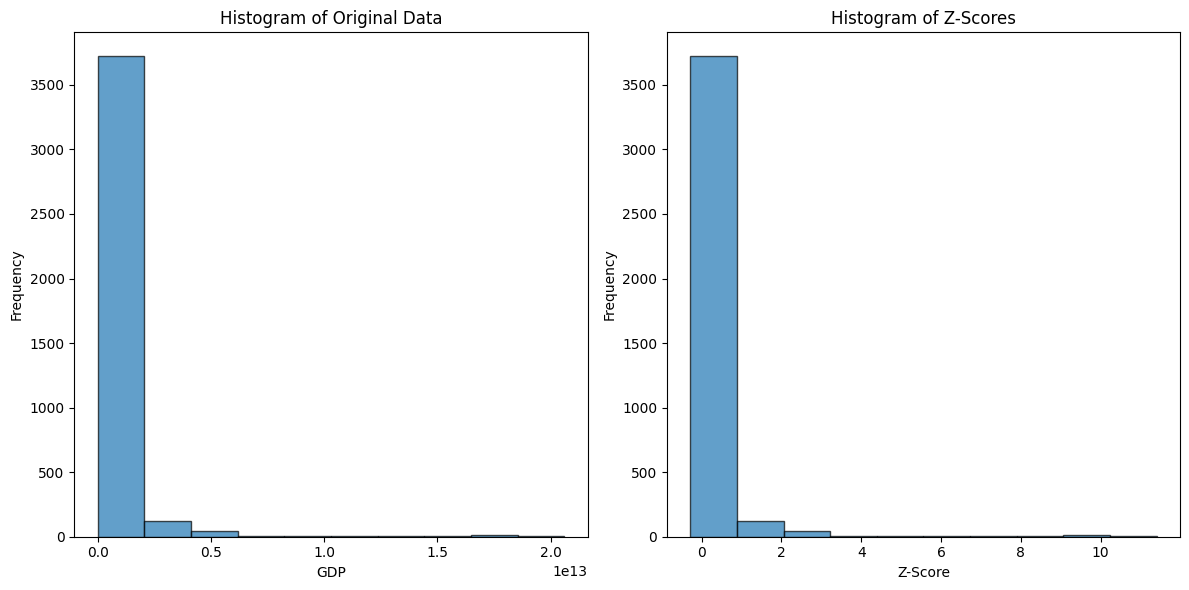

In [41]:
#Histogram for gdp
name = 'GDP'   
gdp_ztest = calculate_z_score(complete_df, name)

plt.figure(figsize=(12, 6))

# Histogram of the original data
plt.subplot(1, 2, 1)
plt.hist(gdp_ztest[name], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Original Data')
plt.xlabel(name)
plt.ylabel('Frequency')

# Histogram of Z-scores
plt.subplot(1, 2, 2)
plt.hist(gdp_ztest['Z-Score'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

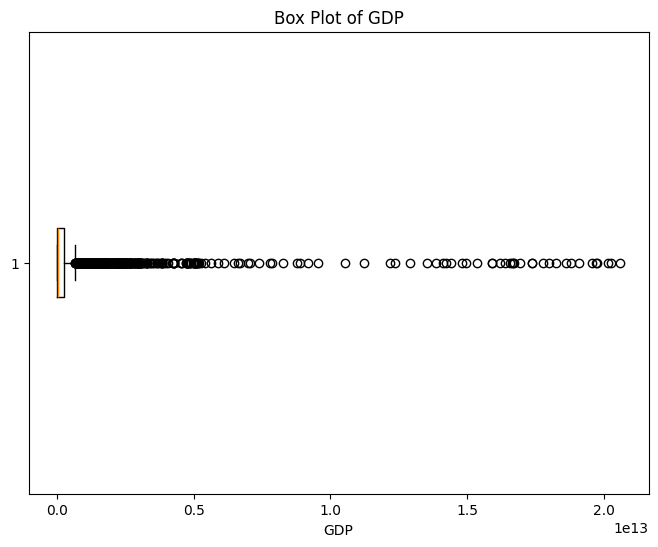

In [42]:
#Box Plot of gdp
name = 'GDP'   
gdp_ztest = calculate_z_score(complete_df, name)

plt.figure(figsize=(8, 6))
plt.boxplot(gdp_ztest[name], vert=False)
plt.title('Box Plot of ' + name)
plt.xlabel(name)
plt.show()

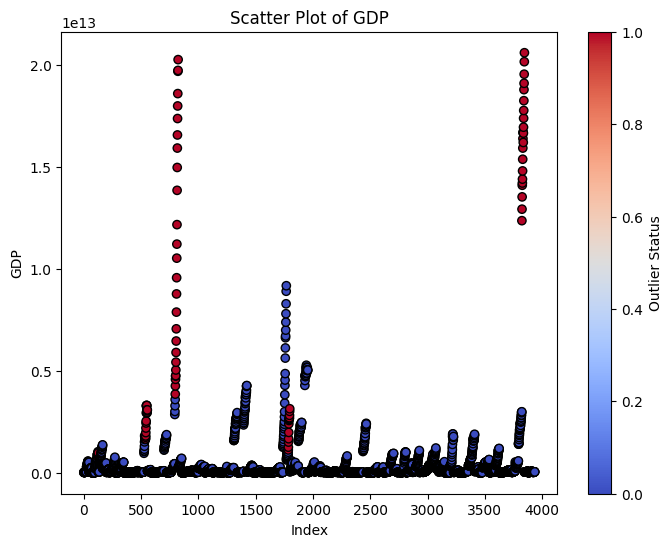

In [31]:
#Scatter plot gdp vs. index
name = 'GDP'   
gdp_ztest = calculate_z_score(complete_df, name)

plt.figure(figsize=(8, 6))
plt.scatter(gdp_ztest.index, gdp_ztest[name], c=gdp_ztest['Is-Outlier'], cmap='coolwarm', edgecolor='k')
plt.title('Scatter Plot of ' + name)
plt.xlabel('Index')
plt.ylabel(name)
plt.colorbar(label='Outlier Status')
plt.show()

# Scatter Plots/Correlation Matrix

The correlation between CO2_Emissions and GDP is 0.93


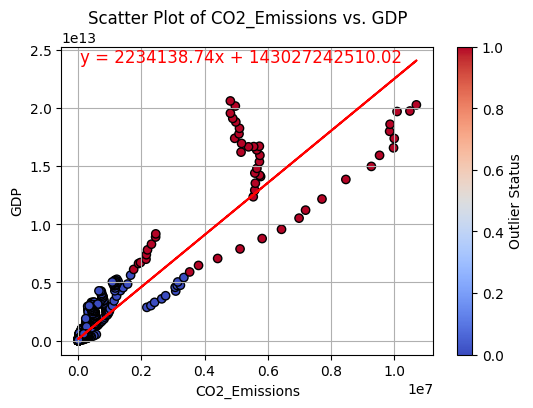

The correlation between Ag_perc_GDP and GDP is -0.16


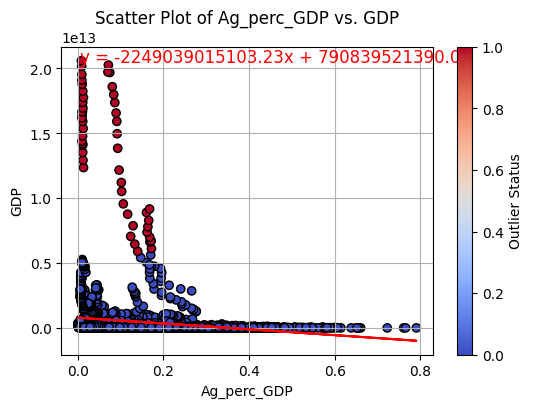

The correlation between Agri_GDP and GDP is 0.66


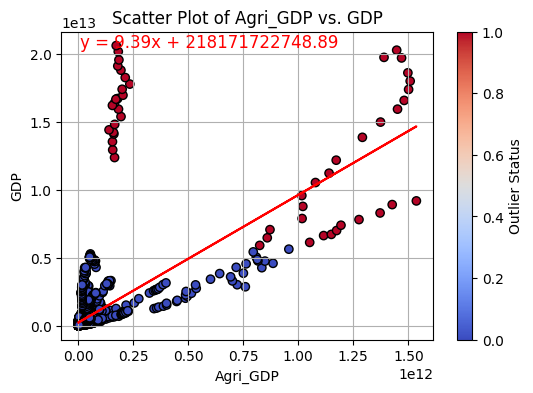

The correlation between Population and GDP is 0.63


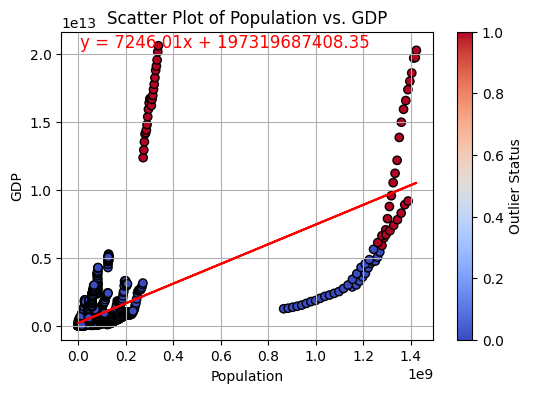

The correlation between Total_Land_sq_km and GDP is 0.62


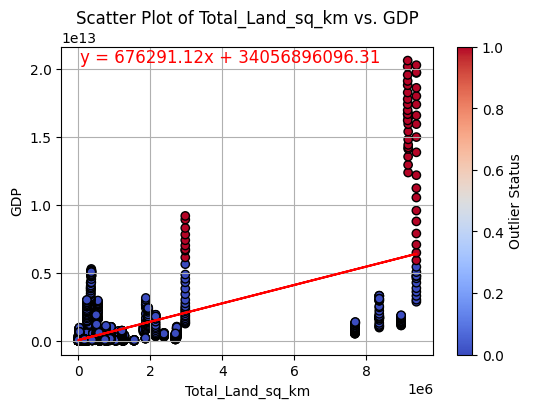

The correlation between Ag_perc_land and GDP is 0.07


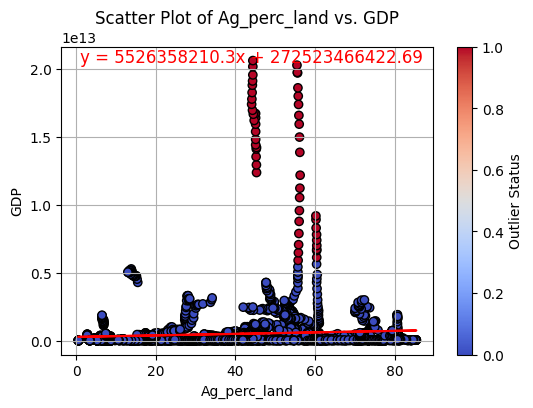

The correlation between Agri_Land_sq_km and GDP is 0.66


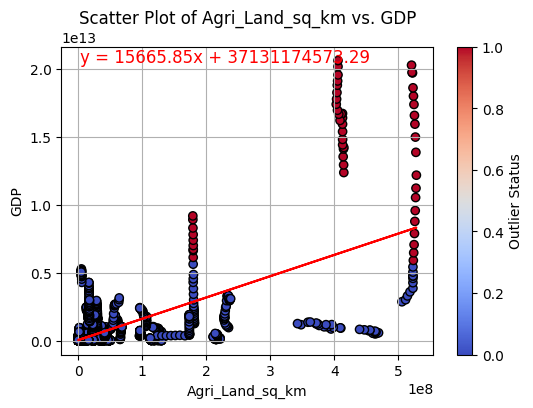

The correlation between Total_Crop_Yield_t_ha and GDP is 0.4


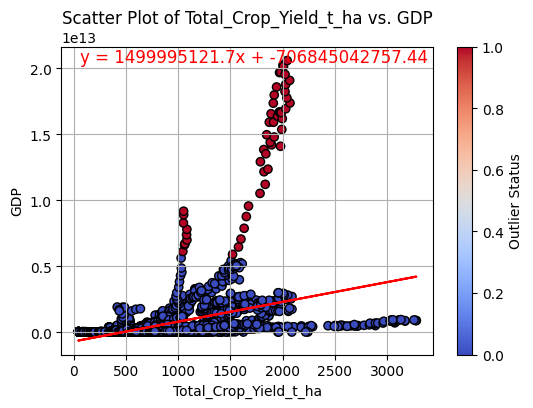

The correlation between Total_Pesticides and GDP is 0.78


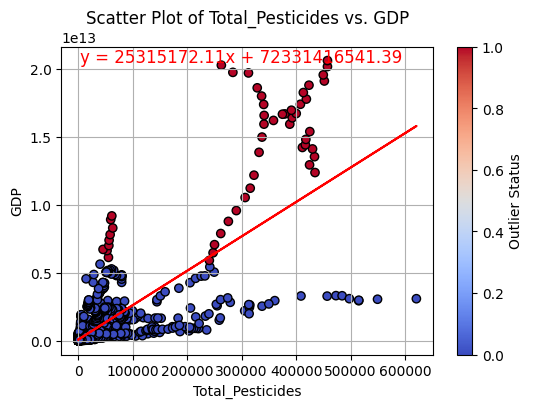

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

def plot_scatter(df, name, features):   
    z_holder = calculate_z_score(df, name)
    
    for f in features:
        if f == name:
            continue
        
        x_axis = z_holder[f]
        y_axis = z_holder[name]

        # Calculate correlation
        correlation = st.pearsonr(x_axis, y_axis)
        print(f"The correlation between {f} and {name} is {round(correlation[0], 2)}")

        # Linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
        regress_values = x_axis * slope + intercept
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

        # Plotting
        plt.figure(figsize=(6, 4))
        scatter = plt.scatter(z_holder[f], z_holder[name], c=z_holder['Is-Outlier'], cmap='coolwarm', edgecolor='k')
        
        plt.plot(x_axis, regress_values, "r-")
        plt.annotate(line_eq, (0.05, 0.95), fontsize=12, color="red", 
                     xycoords='axes fraction', ha='left')

        plt.title(f'Scatter Plot of {f} vs. {name}')
        plt.xlabel(f)
        plt.ylabel(name)
        plt.colorbar(scatter, label='Outlier Status')
        plt.grid(True)
        plt.show()

        # Optional: Store correlation values
        c_values = round(correlation[0], 2)
        # You can collect or log c_values if needed

    return  # Optionally return any relevant data if necessary
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'GDP', column_test)

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

def plot_scatter(df, name, features):   
    z_holder = calculate_z_score(df, name)
    
    for f in features:
        if f == name:
            continue
        
        x_axis = z_holder[f]
        y_axis = z_holder[name]

        # Calculate correlation
        correlation = st.pearsonr(x_axis, y_axis)
        print(f"The correlation between {f} and {name} is {round(correlation[0], 2)}")

        # Linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
        regress_values = x_axis * slope + intercept
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

        # Plotting
        plt.figure(figsize=(6, 4))
        scatter = plt.scatter(z_holder[f], z_holder[name], c=z_holder['Is-Outlier'], cmap='coolwarm', edgecolor='k')
        
        plt.plot(x_axis, regress_values, "r-")
        plt.annotate(line_eq, (0.05, 0.95), fontsize=12, color="red", 
                     xycoords='axes fraction', ha='left')

        plt.title(f'Scatter Plot of {f} vs. {name}')
        plt.xlabel(f)
        plt.ylabel(name)
        plt.colorbar(scatter, label='Outlier Status')
        plt.grid(True)
        plt.show()

        # Optional: Store correlation values
        c_values = round(correlation[0], 2)
        # You can collect or log c_values if needed

    return  # Optionally return any relevant data if necessary


In [ ]:
# def plot_scatter(df, name, features):   
#     z_holder = calculate_z_score(df, name)
    
#     for f in features:
#         if f == name:
#             continue
        
#         x_axis = z_holder[f]
#         y_axis = z_holder[name]

#         correlation = st.pearsonr(x_axis,y_axis)
#         print(f"The correlation between {f} and {name} is {round(correlation[0],2)}")
#         (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#         regress_values = x_axis * slope + intercept
#         line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#         plt.figure(figsize=(8, 6))
#         plt.scatter(z_holder[f], z_holder[name], c=z_holder['Is-Outlier'], cmap='coolwarm', edgecolor='k')
#         plt.plot(x_axis,regress_values,"r-")
#         plt.annotate(line_eq,(20,36),fontsize=12,color="red")
#         plt.title('Scatter Plot of ' + f +' vs. '+ name)
#         plt.xlabel(f)
#         plt.ylabel(name)
#         plt.colorbar(label='Outlier Status')
#         plt.show()

#         c_values = round(correlation[0],2)
#         # corr_values = 
        
# #Scatter plots of GDP versus other factors
# column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
#        'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
#        'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

# plot_scatter(complete_df, 'GDP', column_test)

The correlation between Ag_perc_GDP and CO2_Emissions is -0.11


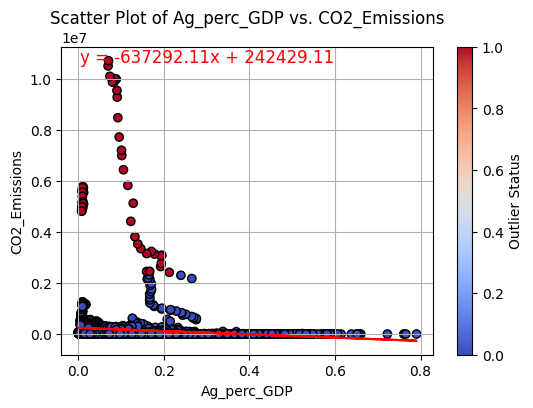

The correlation between GDP and CO2_Emissions is 0.93


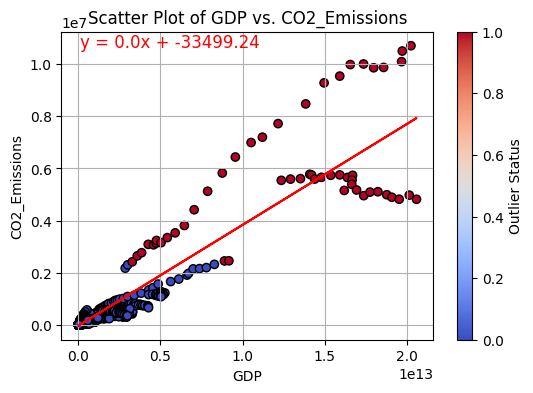

The correlation between Agri_GDP and CO2_Emissions is 0.77


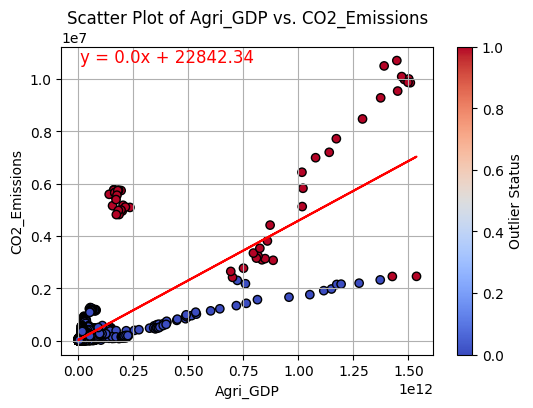

The correlation between Population and CO2_Emissions is 0.72


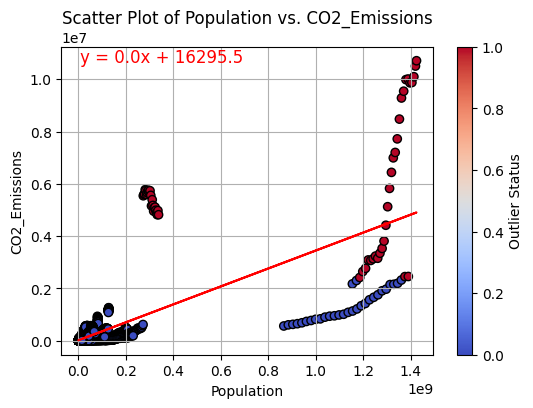

The correlation between Total_Land_sq_km and CO2_Emissions is 0.63


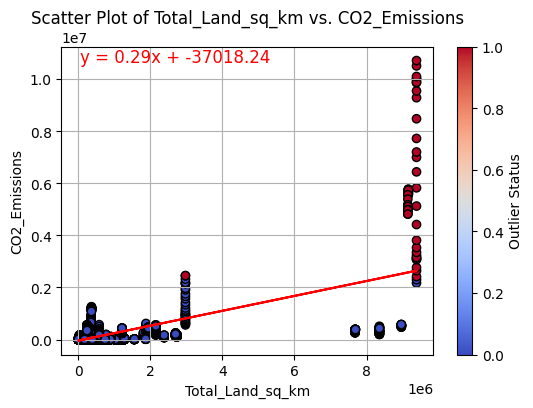

The correlation between Ag_perc_land and CO2_Emissions is 0.08


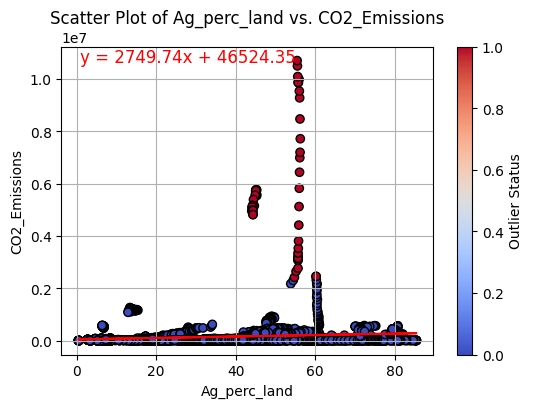

The correlation between Agri_Land_sq_km and CO2_Emissions is 0.71


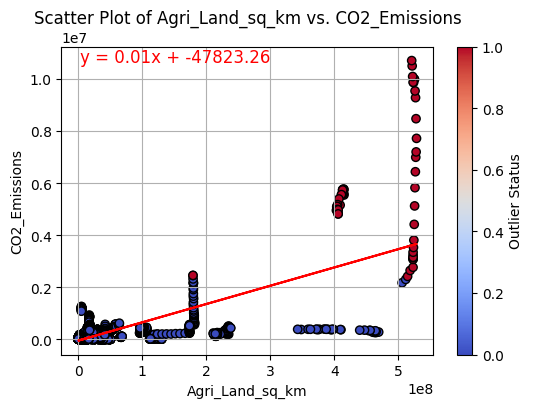

The correlation between Total_Crop_Yield_t_ha and CO2_Emissions is 0.32


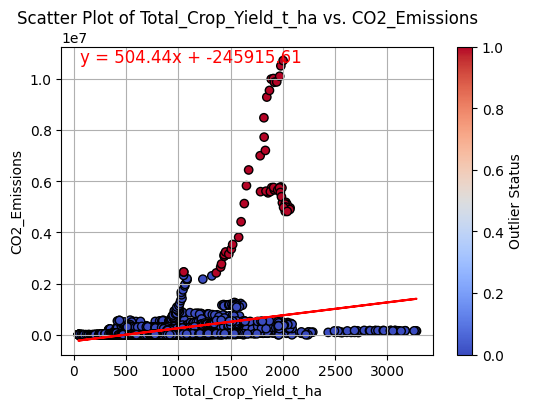

The correlation between Total_Pesticides and CO2_Emissions is 0.71


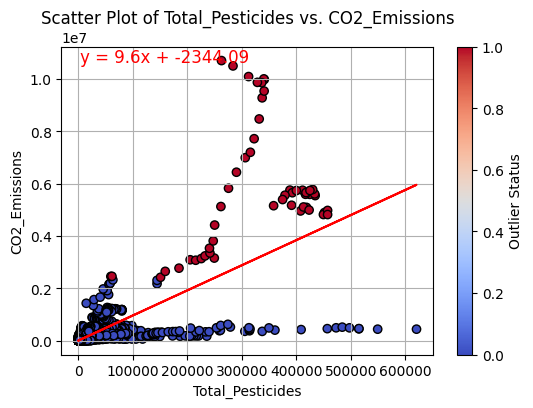

In [152]:
#Scatter plot of emissions versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'CO2_Emissions', column_test)

In [ ]:
#Scatter plot of agricultural percent gdp versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'Ag_perc_GDP', column_test)

In [ ]:
#Scatter plot of of Agricultural gdp versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'Agri_GDP', column_test)

In [ ]:
#Scatter plot of population versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'Population', column_test)

In [ ]:
#Scatter plot of total land versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'Total_Land_sq_km', column_test)

In [ ]:
#Scatter plot of agricultural land versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'Agri_Land_sq_km', column_test)

In [ ]:
#Scatter plot of total crop yield versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'Total_Crop_Yield_t_ha', column_test)

In [ ]:
#Scatter plot of pesticides versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'Total_Pesticides', column_test)

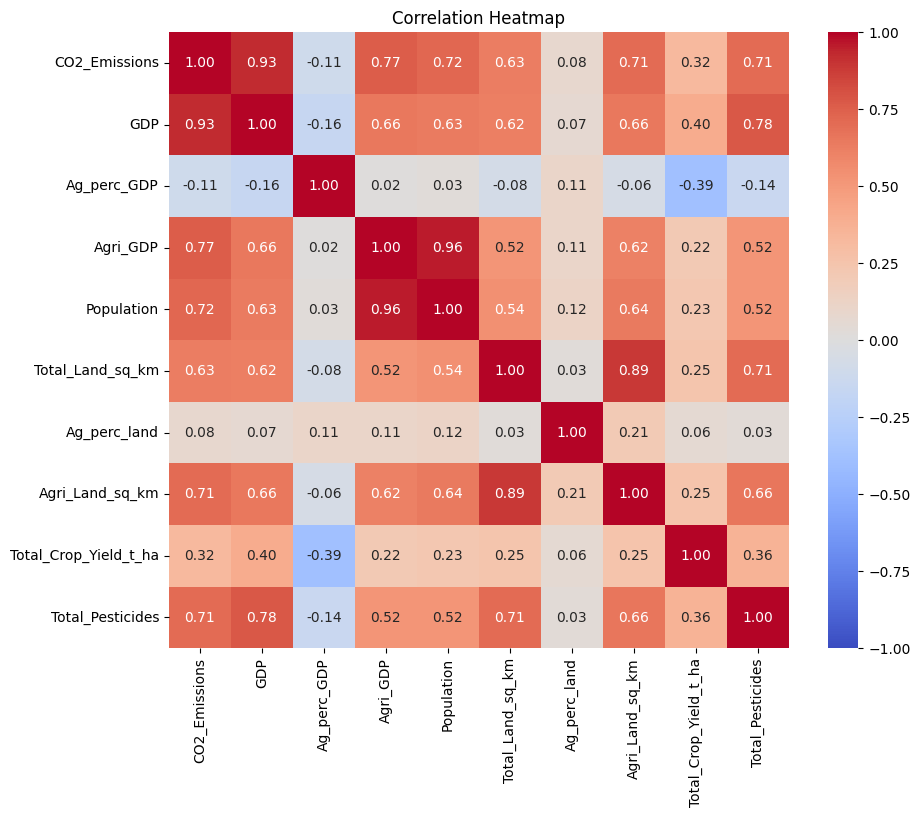

In [72]:
#Attempt to make correlation_matrix
#Matrix created using non altered data from complete_df: does not take into account the 
#possible outliers created from CHINA, USA, INDIA
corr_matrix_df = complete_df.drop(columns = ['Code', 'Year', 'Country', 'Z-Score', 'Is-Outlier'])
corr_matrix_df

corr_mat = corr_matrix_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


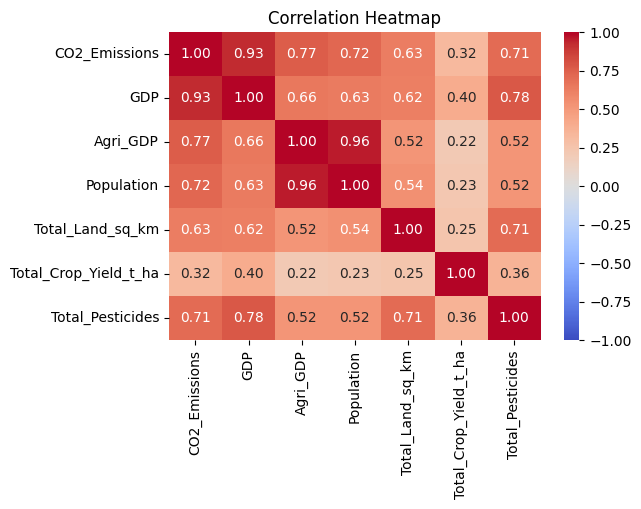

In [148]:
#Attempt to make correlation_matrix shortened only to necessary
#Matrix created using non altered data from complete_df: does not take into account the 
#possible outliers created from CHINA, USA, INDIA
corr_matrix_df = complete_df.drop(columns = ['Code', 'Year', 'Country', 'Z-Score', 'Is-Outlier', 'Agri_Land_sq_km', 'Ag_perc_land',
                                            'Ag_perc_GDP'])
corr_matrix_df

corr_mat = corr_matrix_df.corr()

# Generate a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


# Inspection of Data after removal of outlier countries


In [77]:
#Creating dataframe where outlier countries are cleaved out
countries_to_drop = ['United States', 'India', 'China']
outlier_cleaved_superpowers_df = complete_df[~complete_df['Country'].isin(countries_to_drop)]

outlier_cleaved_superpowers_df

Code   Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
0     ALB   Albania  1996    1940.000000  1.506738e+10     0.364109   
1     ALB   Albania  1997    1470.000000  1.407231e+10     0.315434   
2     ALB   Albania  1998    1790.000000  1.553170e+10     0.287857   
3     ALB   Albania  1999    2970.000000  1.652540e+10     0.259187   
4     ALB   Albania  2000    3170.000000  1.663327e+10     0.245154   
...   ...       ...   ...            ...           ...          ...   
3931  ZWE  Zimbabwe  2015   12430.000305  3.979864e+10     0.082842   
3932  ZWE  Zimbabwe  2016   11020.000458  4.096319e+10     0.078740   
3933  ZWE  Zimbabwe  2017   10340.000153  4.431674e+10     0.083410   
3934  ZWE  Zimbabwe  2018   12380.000114  4.342090e+10     0.073194   
3935  ZWE  Zimbabwe  2019   11760.000229  4.082657e+10     0.098193   

          Agri_GDP  Population  Total_Land_sq_km  Ag_perc_land  \
0     5.486161e+09     3245681           27400.0     41.277372   
1     4.438891e+09     3229665           27400.0     41.423358   
2     4.470902e+09     3210133           27400.0     41.569343   
3     4.283176e+09     3188596           27400.0     41.788321   
4     4.077715e+09     3166147           27400.0     41.751825   
...            ...         ...               ...           ...   
3931  3.297018e+09    14399009          386850.0     41.876696   
3932  3.225436e+09    14600297          386850.0     41.876696   
3933  3.696446e+09    14812484          386850.0     41.876696   
3934  3.178138e+09    15034457          386850.0     41.876696   
3935  4.008868e+09    15271377          386850.0     41.876696   

      Agri_Land_sq_km  Total_Crop_Yield_t_ha  Total_Pesticides   Z-Score  \
0           1131000.0             854.895696            262.40  0.104720   
1           1135000.0             847.477792            273.79  0.088987   
2           1139000.0             850.488892            285.19  0.095373   
3           1145000.0             838.611694            296.59  0.070183   
4           1144000.0             853.764694            307.98  0.102321   
...               ...                    ...               ...       ...   
3931       16200000.0             775.884894           2185.07 -0.062856   
3932       16200000.0             777.129893           2185.07 -0.060216   
3933       16200000.0             774.345388           2185.07 -0.066122   
3934       16200000.0             780.655493           2185.07 -0.052738   
3935       16200000.0             777.940795           2185.07 -0.058496   

      Is-Outlier  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
3931       False  
3932       False  
3933       False  
3934       False  
3935       False  

[3853 rows x 15 columns]

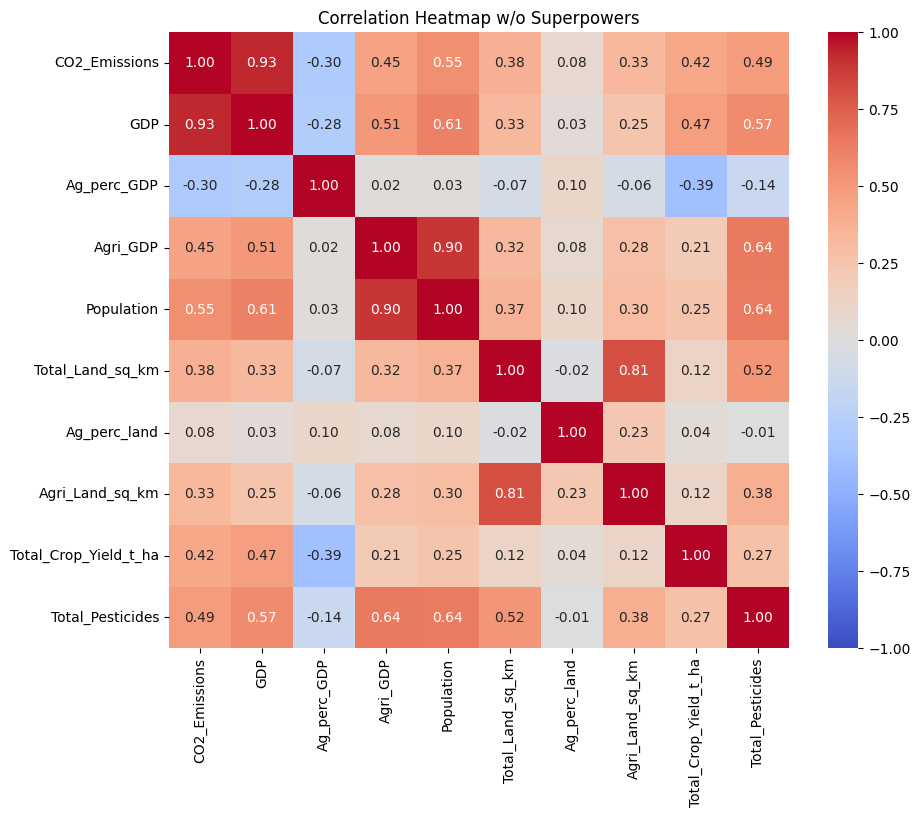

In [79]:
#Attempt to make correlation_matrix with outliers removed
#Matrix created using altered data from complete_df: 
# does  take into account the possible outliers created from CHINA, USA, INDIA
corr_matrix_df = outlier_cleaved_superpowers_df.drop(columns = ['Code', 'Year', 'Country', 'Z-Score', 'Is-Outlier'])
corr_matrix_df

corr_mat = corr_matrix_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap w/o Outlier Countries')
plt.show()


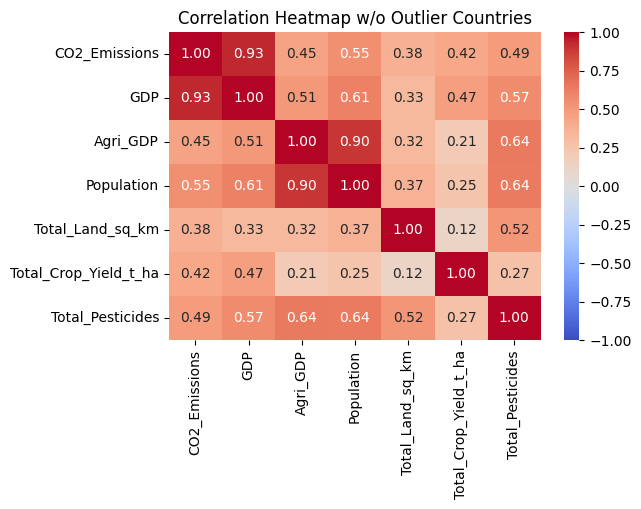

In [150]:
#Matrix created using altered data from complete_df: 
# does  take into account the possible outliers created from CHINA, USA, INDIA
corr_matrix_df = outlier_cleaved_superpowers_df.drop(columns = ['Code', 'Year', 'Country', 'Z-Score', 'Is-Outlier', 'Agri_Land_sq_km', 'Ag_perc_land',
                                            'Ag_perc_GDP'])
corr_matrix_df

corr_mat = corr_matrix_df.corr()

# Generate a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap w/o Outlier Countries')
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\33640839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-Score'] = zscore(df[column_name], nan_policy='omit')
C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\33640839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is-Outlier'] = df['Z-Score'].abs() > threshold


The correlation between Ag_perc_GDP and CO2_Emissions is -0.3


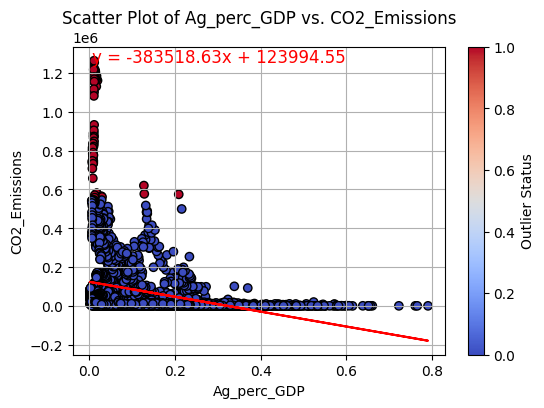

The correlation between GDP and CO2_Emissions is 0.93


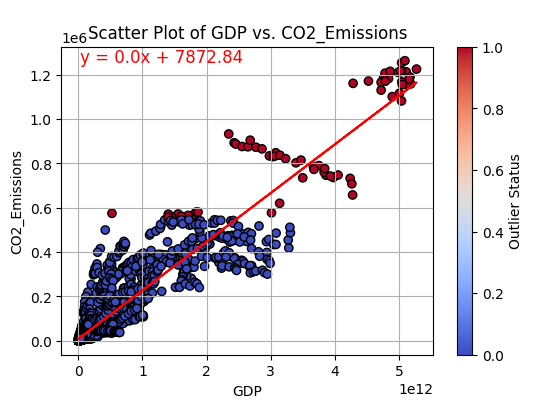

The correlation between Agri_GDP and CO2_Emissions is 0.45


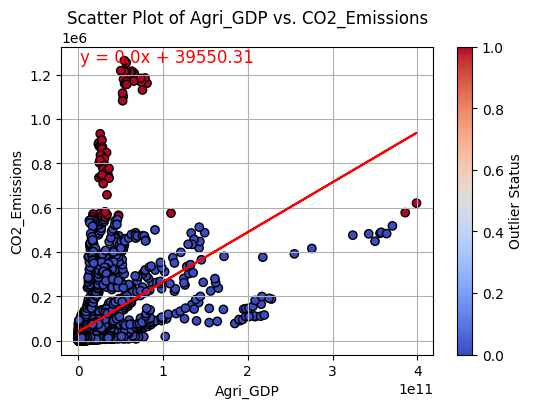

The correlation between Population and CO2_Emissions is 0.55


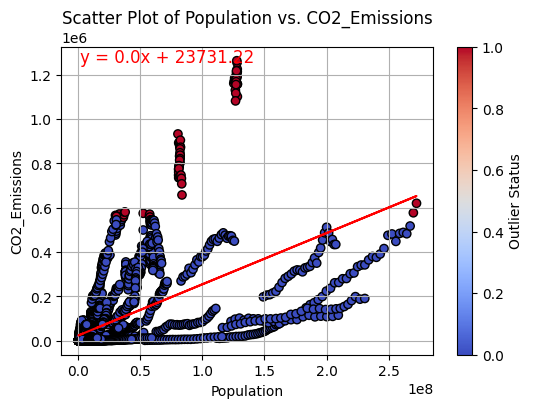

The correlation between Total_Land_sq_km and CO2_Emissions is 0.38


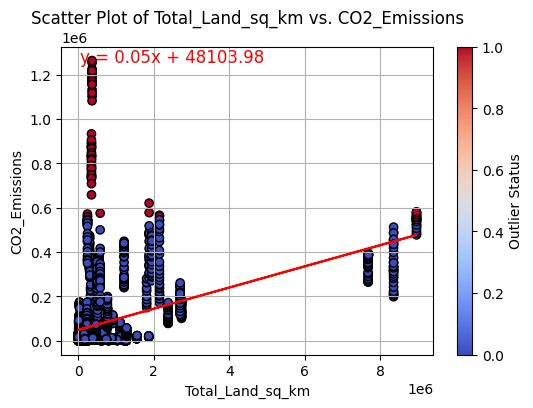

The correlation between Ag_perc_land and CO2_Emissions is 0.08


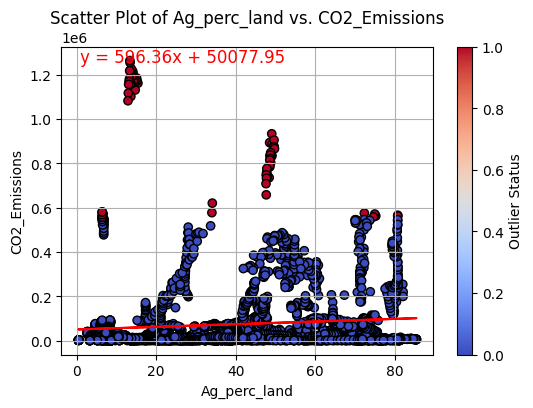

The correlation between Agri_Land_sq_km and CO2_Emissions is 0.33


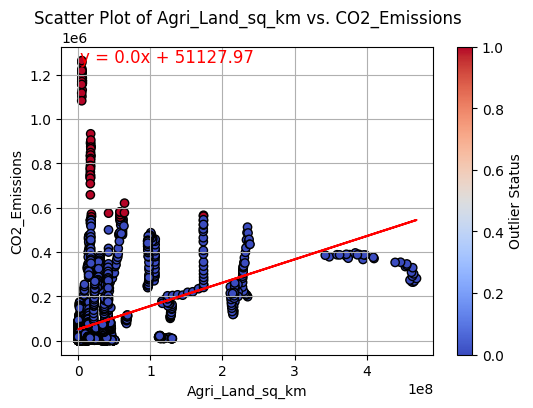

The correlation between Total_Crop_Yield_t_ha and CO2_Emissions is 0.42


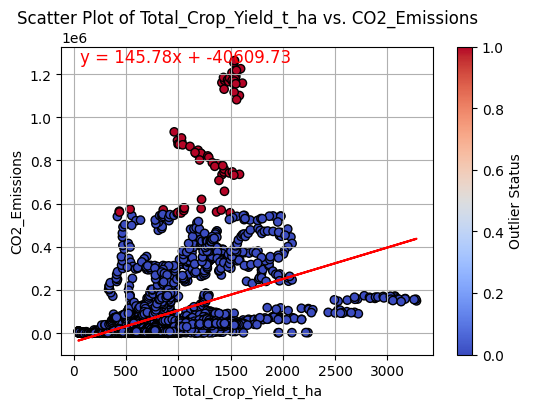

The correlation between Total_Pesticides and CO2_Emissions is 0.49


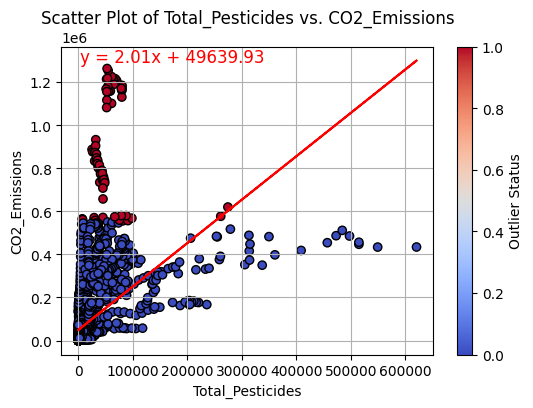

In [153]:
#Scatter plot of emissions versus features using outlier removed countries
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(outlier_cleaved_superpowers_df, 'CO2_Emissions', column_test)

In [80]:
#Further inspection of possible outliers now that superpowers have been removed
# Specify the column for which to calculate Z-scores and find outliers
column_name = ['CO2_Emissions', 'GDP', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
for name in column_name:
    holder = name
    # Find and isolate outliers
    outliers = find_outliers(outlier_cleaved_superpowers_df, name)
    print(f'Outliers for {name}: {outliers}')



Outliers for CO2_Emissions:      Code         Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
710   CAN          Canada  2007  571630.004883  1.555354e+12     0.015872   
716   CAN          Canada  2013  555659.973145  1.723023e+12     0.018942   
717   CAN          Canada  2014  561679.992676  1.780582e+12     0.015865   
718   CAN          Canada  2015  558700.012207  1.691290e+12     0.018698   
719   CAN          Canada  2016  556830.017090  1.711195e+12     0.018622   
...   ...             ...   ...            ...           ...          ...   
3223  SAU    Saudi Arabia  2016  561229.980469  1.605346e+12     0.029470   
3765  UKR         Ukraine  1992  574640.000000  5.242220e+11     0.208520   
3793  GBR  United Kingdom  1990  561770.000000  1.445537e+12     0.012571   
3794  GBR  United Kingdom  1991  570680.000000  1.401683e+12     0.012332   
3795  GBR  United Kingdom  1992  557890.000000  1.399795e+12     0.012230   

          Agri_GDP  Population  Total_Land_sq_k

C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\1195076623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-Score'] = zscore(df[column_name], nan_policy='omit')
C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\1195076623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is-Outlier'] = df['Z-Score'].abs() > threshold
C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\1195076623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [82]:
#Testing random column to see if calc z score function works
random_test_df = calculate_z_score(outlier_cleaved_df, 'GDP')

grabbed_df = random_test_df[random_test_df['Is-Outlier'] == True]
print(grabbed_df['Country'].unique())

['Brazil' 'France' 'Germany' 'Indonesia' 'Italy' 'Japan' 'Mexico'
 'United Kingdom']


C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\33640839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-Score'] = zscore(df[column_name], nan_policy='omit')
C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\33640839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is-Outlier'] = df['Z-Score'].abs() > threshold


C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\33640839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-Score'] = zscore(df[column_name], nan_policy='omit')
C:\Users\eduar\AppData\Local\Temp\ipykernel_36028\33640839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is-Outlier'] = df['Z-Score'].abs() > threshold


The correlation between Ag_perc_GDP and CO2_Emissions is -0.3


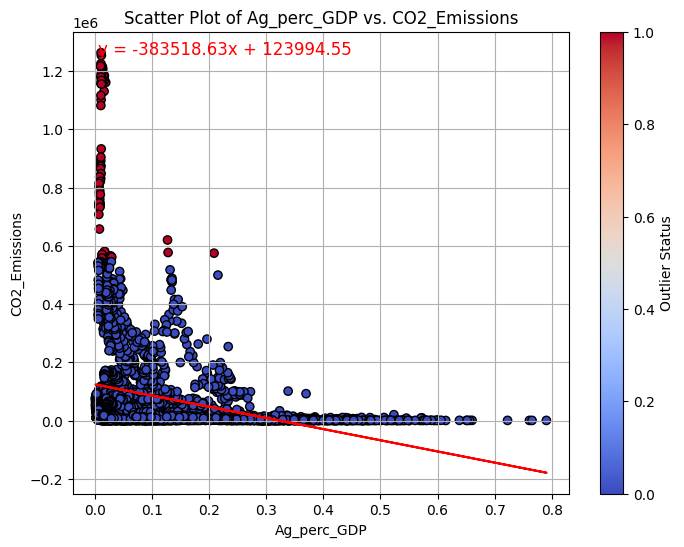

The correlation between GDP and CO2_Emissions is 0.93


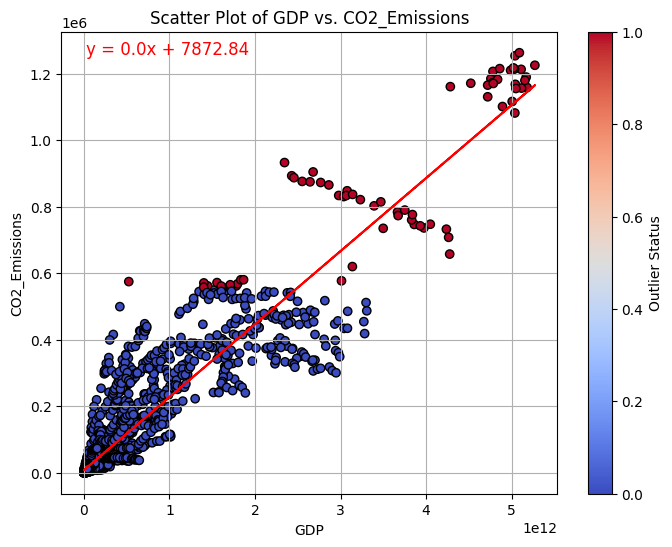

The correlation between Agri_GDP and CO2_Emissions is 0.45


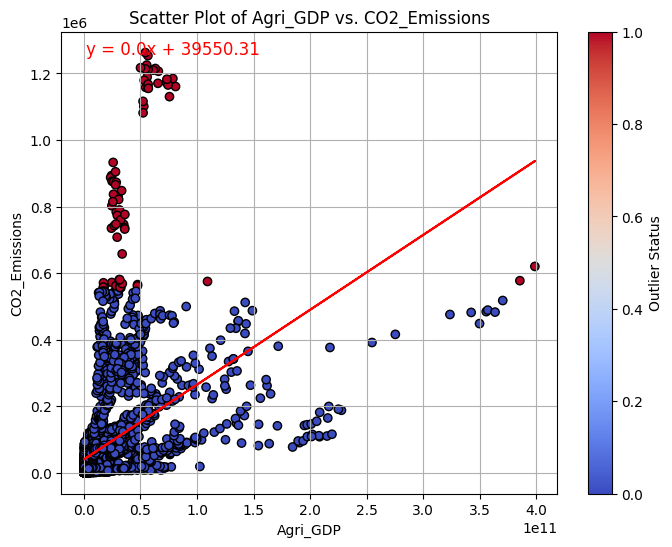

The correlation between Population and CO2_Emissions is 0.55


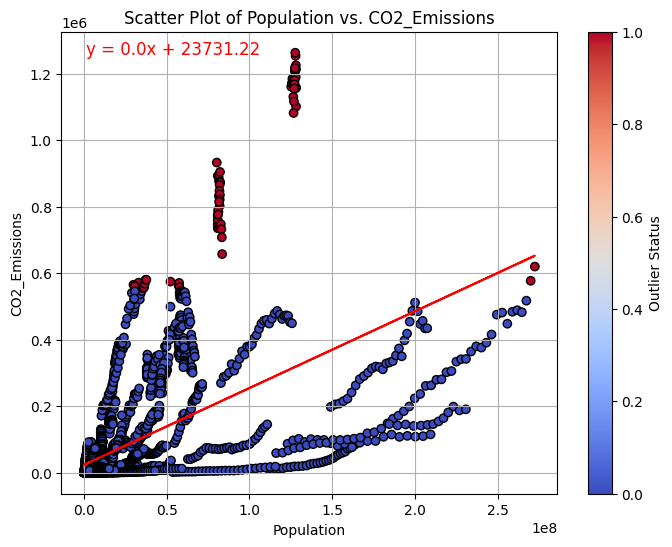

The correlation between Total_Land_sq_km and CO2_Emissions is 0.38


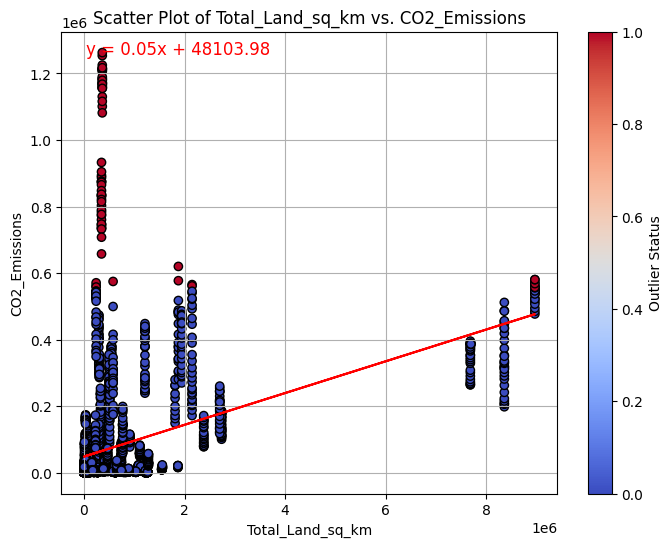

The correlation between Ag_perc_land and CO2_Emissions is 0.08


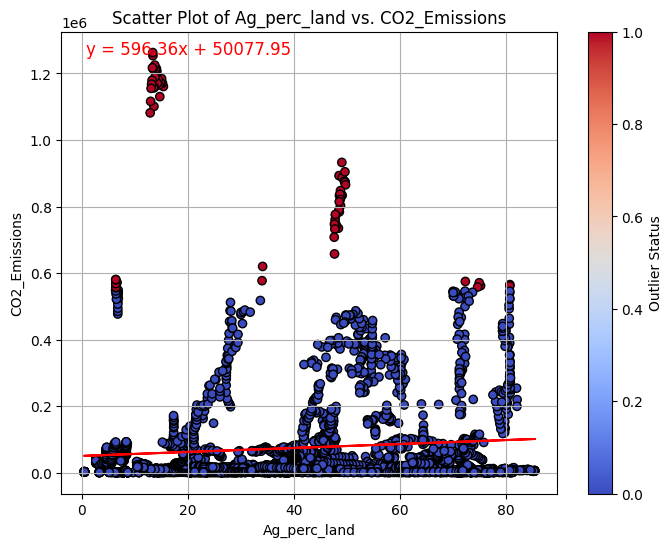

The correlation between Agri_Land_sq_km and CO2_Emissions is 0.33


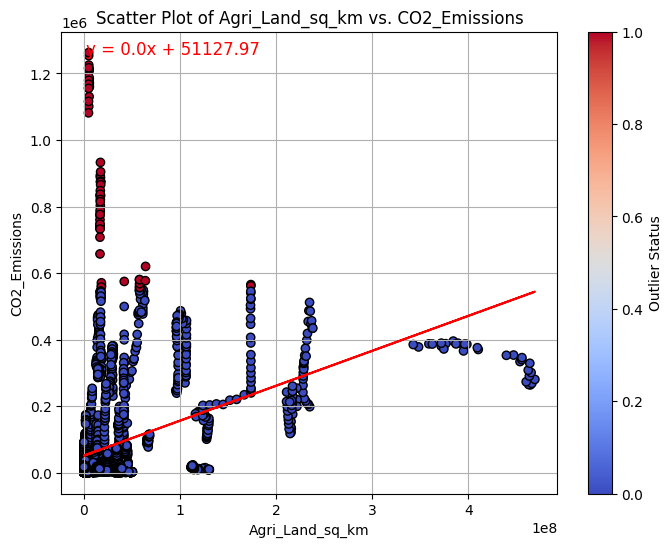

The correlation between Total_Crop_Yield_t_ha and CO2_Emissions is 0.42


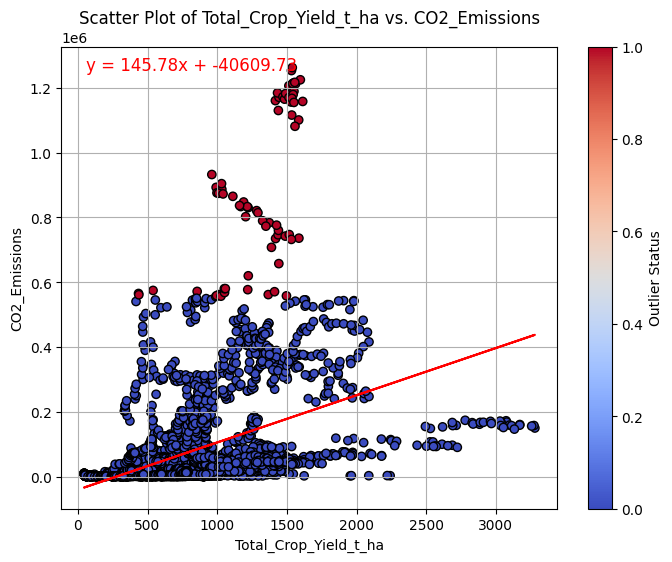

The correlation between Total_Pesticides and CO2_Emissions is 0.49


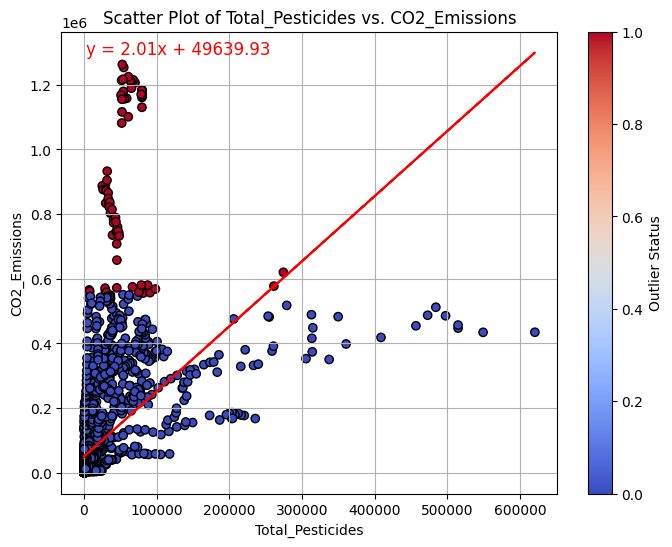

In [131]:
#Scatter plot of no tri country outliers co2
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
outlier_cleaved_superpowers_df.drop(columns = ['Z-Score','Is-Outlier'])
plot_scatter(outlier_cleaved_superpowers_df, 'CO2_Emissions', column_test)


# Screening Dataframe based on GDP quartile


In [83]:
#Screening based on economic wealth
df_agg = gdp_df.groupby('Country').agg({'GDP': 'mean'}).reset_index()
print(df_agg)

# Calculate quartiles
df_agg['Quartile'] = pd.qcut(df_agg['GDP'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the DataFrame with quartiles
print(df_agg)

                 Country           GDP
0                Albania  2.500437e+10
1                Algeria  4.469018e+11
2                 Angola  1.290528e+11
3    Antigua and Barbuda  1.248473e+09
4              Argentina  6.299411e+11
..                   ...           ...
140       United Kingdom  2.214254e+12
141        United States  1.646606e+13
142              Uruguay  4.890134e+10
143               Zambia  2.865048e+10
144             Zimbabwe  4.266257e+10

[145 rows x 2 columns]
                 Country           GDP Quartile
0                Albania  2.500437e+10       Q2
1                Algeria  4.469018e+11       Q4
2                 Angola  1.290528e+11       Q3
3    Antigua and Barbuda  1.248473e+09       Q1
4              Argentina  6.299411e+11       Q4
..                   ...           ...      ...
140       United Kingdom  2.214254e+12       Q4
141        United States  1.646606e+13       Q4
142              Uruguay  4.890134e+10       Q2
143               Zambia  2.

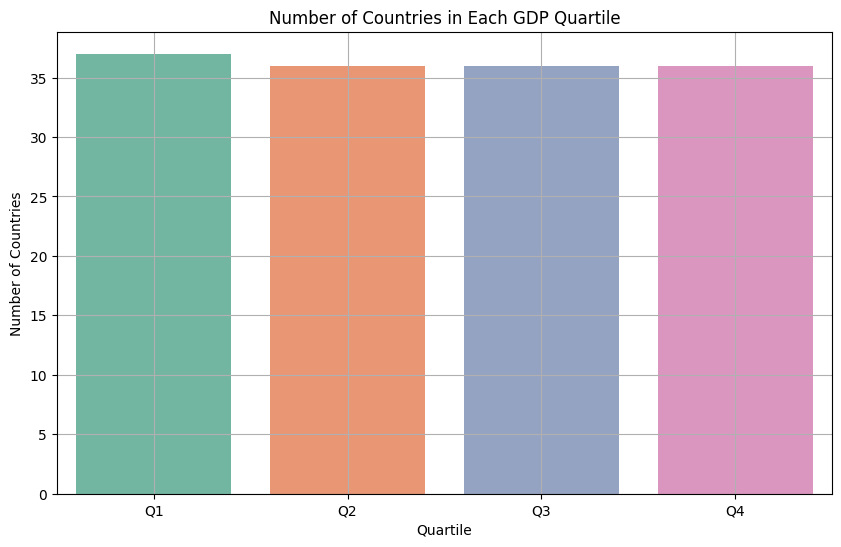

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of the number of countries in each quartile
plt.figure(figsize=(10, 6))
sns.countplot(x='Quartile', data=df_agg, hue='Quartile', palette='Set2')
plt.title('Number of Countries in Each GDP Quartile')
plt.xlabel('Quartile')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

In [85]:
quartile_dict = df_agg.set_index('Country')['Quartile'].to_dict()
print(quartile_dict)

{'Albania': 'Q2', 'Algeria': 'Q4', 'Angola': 'Q3', 'Antigua and Barbuda': 'Q1', 'Argentina': 'Q4', 'Armenia': 'Q2', 'Australia': 'Q4', 'Austria': 'Q4', 'Azerbaijan': 'Q3', 'Bahrain': 'Q2', 'Bangladesh': 'Q4', 'Barbados': 'Q1', 'Belarus': 'Q3', 'Belgium': 'Q4', 'Belize': 'Q1', 'Benin': 'Q1', 'Bhutan': 'Q1', 'Bolivia': 'Q2', 'Bosnia and Herzegovina': 'Q2', 'Botswana': 'Q2', 'Brazil': 'Q4', 'Bulgaria': 'Q3', 'Burkina Faso': 'Q2', 'Burundi': 'Q1', 'Cambodia': 'Q2', 'Cameroon': 'Q2', 'Canada': 'Q4', 'Central African Republic': 'Q1', 'Chad': 'Q1', 'Chile': 'Q3', 'China': 'Q4', 'Colombia': 'Q4', 'Comoros': 'Q1', 'Costa Rica': 'Q2', "Cote d'Ivoire": 'Q3', 'Croatia': 'Q3', 'Cyprus': 'Q1', 'Czechia': 'Q3', 'Denmark': 'Q3', 'Djibouti': 'Q1', 'Dominican Republic': 'Q3', 'Ecuador': 'Q3', 'El Salvador': 'Q2', 'Equatorial Guinea': 'Q2', 'Estonia': 'Q2', 'Eswatini': 'Q1', 'Ethiopia': 'Q3', 'Fiji': 'Q1', 'Finland': 'Q3', 'France': 'Q4', 'Gabon': 'Q1', 'Georgia': 'Q2', 'Germany': 'Q4', 'Ghana': 'Q3', 'G

In [86]:
gdp_df

_id   Country Code  Year          GDP  Ag_perc_GDP  \
0     66e8ea07f7ae5334e5328b28   Albania  ALB  1996  15067375000     0.364109   
1     66e8ea07f7ae5334e5328b29   Albania  ALB  1997  14072310000     0.315434   
2     66e8ea07f7ae5334e5328b2a   Albania  ALB  1998  15531704000     0.287857   
3     66e8ea07f7ae5334e5328b2b   Albania  ALB  1999  16525398000     0.259187   
4     66e8ea07f7ae5334e5328b2c   Albania  ALB  2000  16633271000     0.245154   
...                        ...       ...  ...   ...          ...          ...   
3992  66e8ea07f7ae5334e5329ac0  Zimbabwe  ZWE  2015  39798645000     0.082842   
3993  66e8ea07f7ae5334e5329ac1  Zimbabwe  ZWE  2016  40963190000     0.078740   
3994  66e8ea07f7ae5334e5329ac2  Zimbabwe  ZWE  2017  44316740000     0.083410   
3995  66e8ea07f7ae5334e5329ac3  Zimbabwe  ZWE  2018  43420897000     0.073194   
3996  66e8ea07f7ae5334e5329ac4  Zimbabwe  ZWE  2019  40826570000     0.098193   

          Agri_GDP  
0     5.486161e+09  
1     4.438891e+09  
2     4.470902e+09  
3     4.283176e+09  
4     4.077715e+09  
...            ...  
3992  3.297018e+09  
3993  3.225436e+09  
3994  3.696446e+09  
3995  3.178138e+09  
3996  4.008868e+09  

[3997 rows x 7 columns]

In [87]:
gdp_df['Quartile'] = gdp_df['Country'].map(quartile_dict)
print(gdp_df.head())

                        _id  Country Code  Year          GDP  Ag_perc_GDP  \
0  66e8ea07f7ae5334e5328b28  Albania  ALB  1996  15067375000     0.364109   
1  66e8ea07f7ae5334e5328b29  Albania  ALB  1997  14072310000     0.315434   
2  66e8ea07f7ae5334e5328b2a  Albania  ALB  1998  15531704000     0.287857   
3  66e8ea07f7ae5334e5328b2b  Albania  ALB  1999  16525398000     0.259187   
4  66e8ea07f7ae5334e5328b2c  Albania  ALB  2000  16633271000     0.245154   

       Agri_GDP Quartile  
0  5.486161e+09       Q2  
1  4.438891e+09       Q2  
2  4.470902e+09       Q2  
3  4.283176e+09       Q2  
4  4.077715e+09       Q2  


In [88]:
gdp_df

_id   Country Code  Year          GDP  Ag_perc_GDP  \
0     66e8ea07f7ae5334e5328b28   Albania  ALB  1996  15067375000     0.364109   
1     66e8ea07f7ae5334e5328b29   Albania  ALB  1997  14072310000     0.315434   
2     66e8ea07f7ae5334e5328b2a   Albania  ALB  1998  15531704000     0.287857   
3     66e8ea07f7ae5334e5328b2b   Albania  ALB  1999  16525398000     0.259187   
4     66e8ea07f7ae5334e5328b2c   Albania  ALB  2000  16633271000     0.245154   
...                        ...       ...  ...   ...          ...          ...   
3992  66e8ea07f7ae5334e5329ac0  Zimbabwe  ZWE  2015  39798645000     0.082842   
3993  66e8ea07f7ae5334e5329ac1  Zimbabwe  ZWE  2016  40963190000     0.078740   
3994  66e8ea07f7ae5334e5329ac2  Zimbabwe  ZWE  2017  44316740000     0.083410   
3995  66e8ea07f7ae5334e5329ac3  Zimbabwe  ZWE  2018  43420897000     0.073194   
3996  66e8ea07f7ae5334e5329ac4  Zimbabwe  ZWE  2019  40826570000     0.098193   

          Agri_GDP Quartile  
0     5.486161e+09       Q2  
1     4.438891e+09       Q2  
2     4.470902e+09       Q2  
3     4.283176e+09       Q2  
4     4.077715e+09       Q2  
...            ...      ...  
3992  3.297018e+09       Q2  
3993  3.225436e+09       Q2  
3994  3.696446e+09       Q2  
3995  3.178138e+09       Q2  
3996  4.008868e+09       Q2  

[3997 rows x 8 columns]

In [89]:
gdp_q1 = gdp_df[gdp_df['Quartile']== 'Q1']
gdp_q1

gdp_q2 = gdp_df[gdp_df['Quartile'] =='Q2']
gdp_q2

gdp_q3 = gdp_df[gdp_df['Quartile'] =='Q3']
gdp_q3

gdp_q4 = gdp_df[gdp_df['Quartile'] =='Q4']
gdp_q4

_id        Country Code  Year             GDP  \
24    66e8ea07f7ae5334e5328b40        Algeria  DZA  1999    272028660000   
25    66e8ea07f7ae5334e5328b41        Algeria  DZA  2000    301252000000   
26    66e8ea07f7ae5334e5328b42        Algeria  DZA  2001    303689430000   
27    66e8ea07f7ae5334e5328b43        Algeria  DZA  2002    314770200000   
28    66e8ea07f7ae5334e5328b44        Algeria  DZA  2003    343126670000   
...                        ...            ...  ...   ...             ...   
3902  66e8ea07f7ae5334e5329a66  United States  USA  2015  18785359000000   
3903  66e8ea07f7ae5334e5329a67  United States  USA  2016  19095196000000   
3904  66e8ea07f7ae5334e5329a68  United States  USA  2017  19542980000000   
3905  66e8ea07f7ae5334e5329a69  United States  USA  2018  20155260000000   
3906  66e8ea07f7ae5334e5329a6a  United States  USA  2019  20595845000000   

      Ag_perc_GDP      Agri_GDP Quartile  
24       0.111070  3.021417e+10       Q4  
25       0.083950  2.529025e+10       Q4  
26       0.097494  2.960796e+10       Q4  
27       0.092250  2.903749e+10       Q4  
28       0.098106  3.366264e+10       Q4  
...           ...           ...      ...  
3902     0.010339  1.942282e+11       Q4  
3903     0.009426  1.799998e+11       Q4  
3904     0.009469  1.850464e+11       Q4  
3905     0.009039  1.821835e+11       Q4  
3906     0.008388  1.727606e+11       Q4  

[1017 rows x 8 columns]

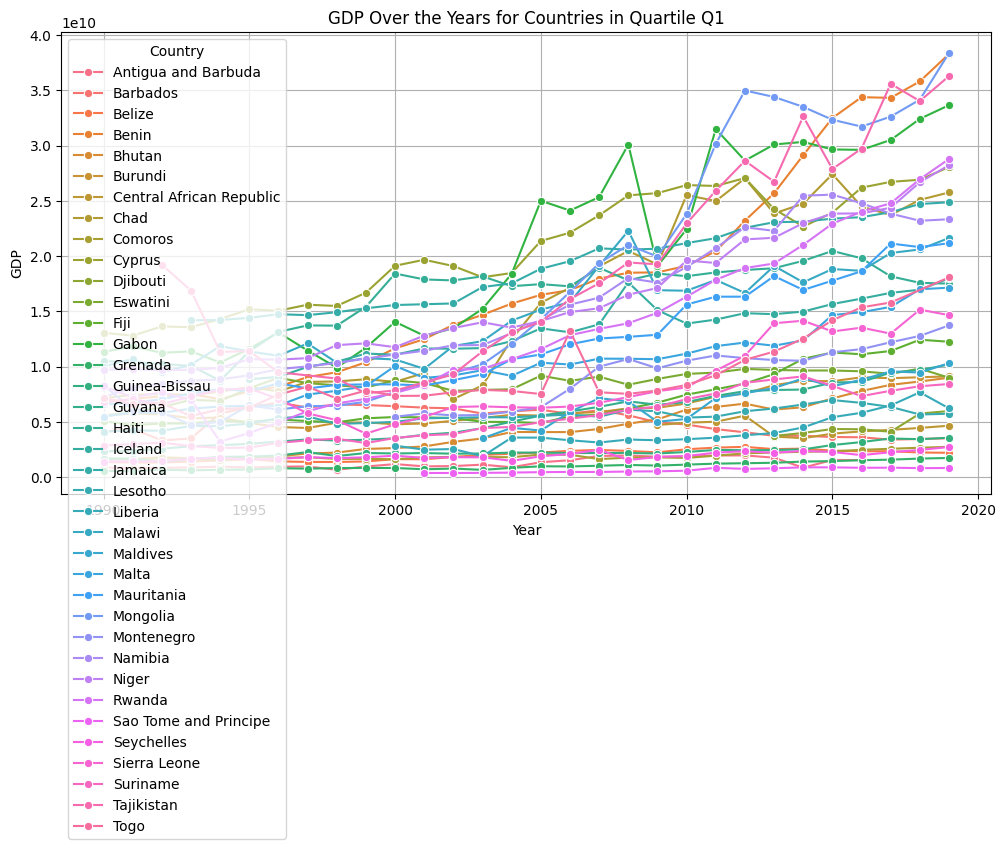

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q1, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q1')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

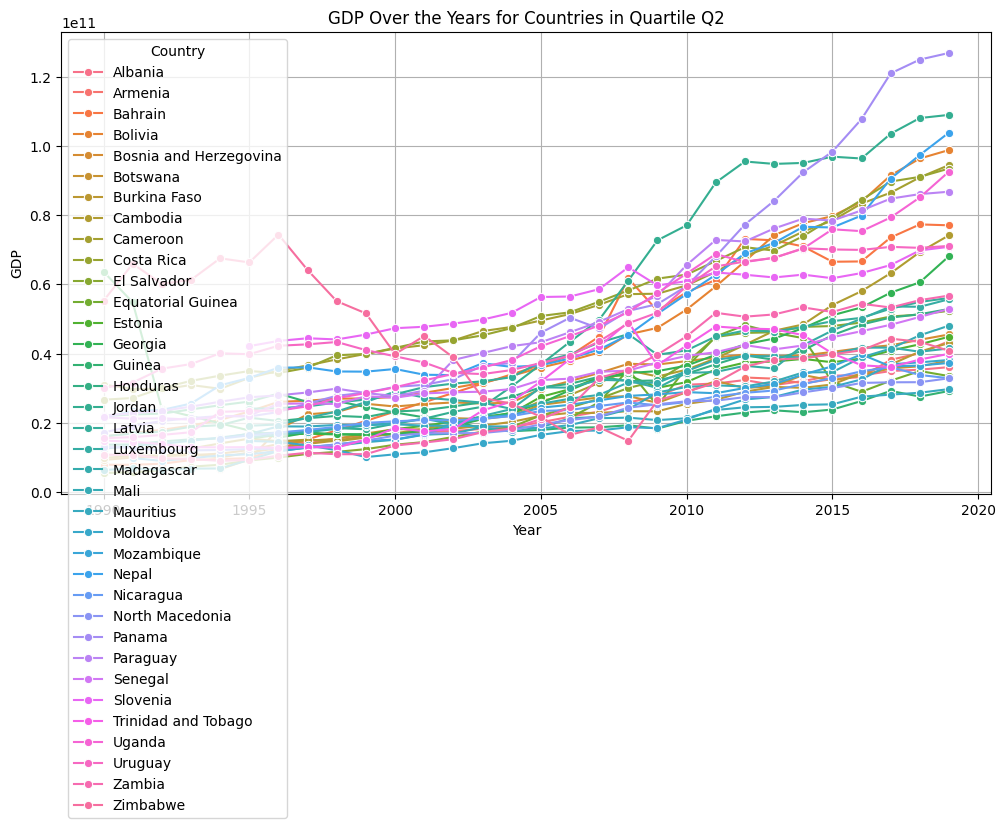

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q2, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q2')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

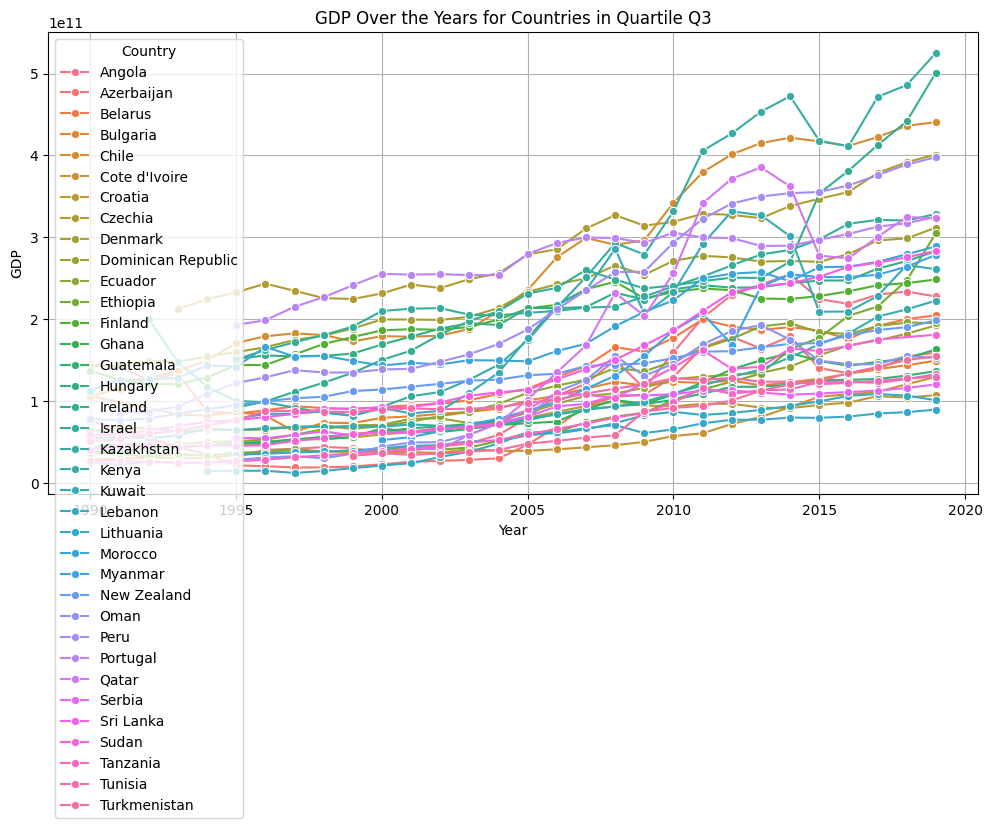

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q3, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q3')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

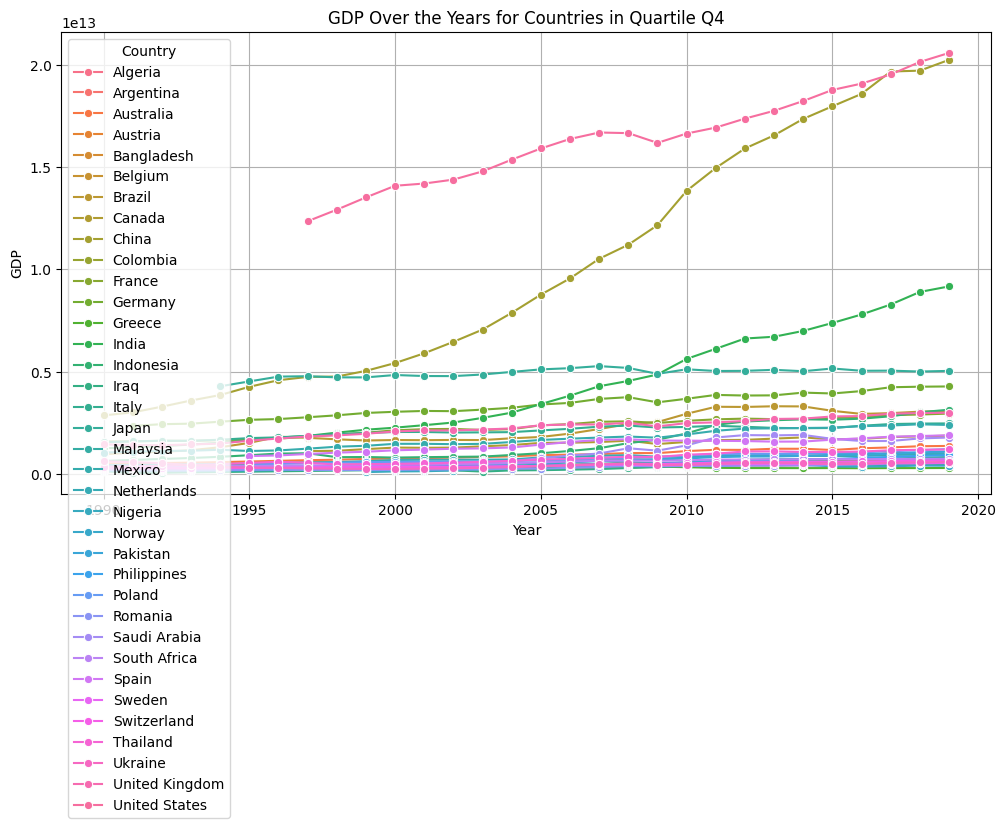

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q4, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q4')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

In [95]:
complete_df

Code   Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
0     ALB   Albania  1996    1940.000000  1.506738e+10     0.364109   
1     ALB   Albania  1997    1470.000000  1.407231e+10     0.315434   
2     ALB   Albania  1998    1790.000000  1.553170e+10     0.287857   
3     ALB   Albania  1999    2970.000000  1.652540e+10     0.259187   
4     ALB   Albania  2000    3170.000000  1.663327e+10     0.245154   
...   ...       ...   ...            ...           ...          ...   
3931  ZWE  Zimbabwe  2015   12430.000305  3.979864e+10     0.082842   
3932  ZWE  Zimbabwe  2016   11020.000458  4.096319e+10     0.078740   
3933  ZWE  Zimbabwe  2017   10340.000153  4.431674e+10     0.083410   
3934  ZWE  Zimbabwe  2018   12380.000114  4.342090e+10     0.073194   
3935  ZWE  Zimbabwe  2019   11760.000229  4.082657e+10     0.098193   

          Agri_GDP  Population  Total_Land_sq_km  Ag_perc_land  \
0     5.486161e+09     3245681           27400.0     41.277372   
1     4.438891e+09     3229665           27400.0     41.423358   
2     4.470902e+09     3210133           27400.0     41.569343   
3     4.283176e+09     3188596           27400.0     41.788321   
4     4.077715e+09     3166147           27400.0     41.751825   
...            ...         ...               ...           ...   
3931  3.297018e+09    14399009          386850.0     41.876696   
3932  3.225436e+09    14600297          386850.0     41.876696   
3933  3.696446e+09    14812484          386850.0     41.876696   
3934  3.178138e+09    15034457          386850.0     41.876696   
3935  4.008868e+09    15271377          386850.0     41.876696   

      Agri_Land_sq_km  Total_Crop_Yield_t_ha  Total_Pesticides   Z-Score  \
0           1131000.0             854.895696            262.40  0.104720   
1           1135000.0             847.477792            273.79  0.088987   
2           1139000.0             850.488892            285.19  0.095373   
3           1145000.0             838.611694            296.59  0.070183   
4           1144000.0             853.764694            307.98  0.102321   
...               ...                    ...               ...       ...   
3931       16200000.0             775.884894           2185.07 -0.062856   
3932       16200000.0             777.129893           2185.07 -0.060216   
3933       16200000.0             774.345388           2185.07 -0.066122   
3934       16200000.0             780.655493           2185.07 -0.052738   
3935       16200000.0             777.940795           2185.07 -0.058496   

      Is-Outlier  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
3931       False  
3932       False  
3933       False  
3934       False  
3935       False  

[3936 rows x 15 columns]

In [96]:
gdp_df

_id   Country Code  Year          GDP  Ag_perc_GDP  \
0     66e8ea07f7ae5334e5328b28   Albania  ALB  1996  15067375000     0.364109   
1     66e8ea07f7ae5334e5328b29   Albania  ALB  1997  14072310000     0.315434   
2     66e8ea07f7ae5334e5328b2a   Albania  ALB  1998  15531704000     0.287857   
3     66e8ea07f7ae5334e5328b2b   Albania  ALB  1999  16525398000     0.259187   
4     66e8ea07f7ae5334e5328b2c   Albania  ALB  2000  16633271000     0.245154   
...                        ...       ...  ...   ...          ...          ...   
3992  66e8ea07f7ae5334e5329ac0  Zimbabwe  ZWE  2015  39798645000     0.082842   
3993  66e8ea07f7ae5334e5329ac1  Zimbabwe  ZWE  2016  40963190000     0.078740   
3994  66e8ea07f7ae5334e5329ac2  Zimbabwe  ZWE  2017  44316740000     0.083410   
3995  66e8ea07f7ae5334e5329ac3  Zimbabwe  ZWE  2018  43420897000     0.073194   
3996  66e8ea07f7ae5334e5329ac4  Zimbabwe  ZWE  2019  40826570000     0.098193   

          Agri_GDP Quartile  
0     5.486161e+09       Q2  
1     4.438891e+09       Q2  
2     4.470902e+09       Q2  
3     4.283176e+09       Q2  
4     4.077715e+09       Q2  
...            ...      ...  
3992  3.297018e+09       Q2  
3993  3.225436e+09       Q2  
3994  3.696446e+09       Q2  
3995  3.178138e+09       Q2  
3996  4.008868e+09       Q2  

[3997 rows x 8 columns]

In [100]:
#Recreating complete df with quartiles on gdp
economic_partition_df = pd.merge(complete_df, gdp_df, how = 'left', left_on = ['Code', 'Country', 'Year', 'GDP', 'Ag_perc_GDP', 'Agri_GDP'],
                                 right_on = ['Code', 'Country', 'Year', 'GDP', 'Ag_perc_GDP', 'Agri_GDP']).dropna()
economic_partition_df = economic_partition_df.drop(columns= ['_id', 'Z-Score', 'Is-Outlier'])

economic_partition_df                                    

ep_q1_df = economic_partition_df[economic_partition_df['Quartile'] =='Q1']
ep_q2_df = economic_partition_df[economic_partition_df['Quartile'] =='Q2']
ep_q3_df = economic_partition_df[economic_partition_df['Quartile'] =='Q3']
ep_q4_df = economic_partition_df[economic_partition_df['Quartile'] =='Q4']


Code              Country  Year  CO2_Emissions           GDP  \
70    ATG  Antigua and Barbuda  1990     210.000000  8.447089e+08   
71    ATG  Antigua and Barbuda  1991     220.000000  8.354738e+08   
72    ATG  Antigua and Barbuda  1992     290.000000  8.357832e+08   
73    ATG  Antigua and Barbuda  1993     250.000000  8.566738e+08   
74    ATG  Antigua and Barbuda  1994     250.000000  9.376858e+08   
...   ...                  ...   ...            ...           ...   
3649  TGO                 Togo  2014    1590.000033  1.252721e+10   
3650  TGO                 Togo  2015    1830.000043  1.418987e+10   
3651  TGO                 Togo  2016    2299.999952  1.535744e+10   
3652  TGO                 Togo  2017    2069.999933  1.579479e+10   
3653  TGO                 Togo  2019    2369.999886  1.806592e+10   

      Ag_perc_GDP      Agri_GDP  Population  Total_Land_sq_km  Ag_perc_land  \
70       0.017806  1.504117e+07       63087             440.0     20.454545   
71       0.017799  1.487088e+07       63406             440.0     20.454545   
72       0.018026  1.506575e+07       64421             440.0     20.454545   
73       0.017454  1.495208e+07       65600             440.0     20.454545   
74       0.015765  1.478299e+07       66860             440.0     20.454545   
...           ...           ...         ...               ...           ...   
3649     0.193388  2.422618e+09     7472458           54390.0     70.233499   
3650     0.189219  2.684988e+09     7663199           54390.0     70.233499   
3651     0.203851  3.130627e+09     7858297           54390.0     70.233499   
3652     0.203156  3.208800e+09     8057139           54390.0     70.233499   
3653     0.195146  3.525490e+09     8463068           54390.0     70.233499   

      Agri_Land_sq_km  Total_Crop_Yield_t_ha  Total_Pesticides Quartile  
70             9000.0             166.635398            289.45       Q1  
71             9000.0             164.248498            289.45       Q1  
72             9000.0             167.128795            289.45       Q1  
73             9000.0             163.675597            289.45       Q1  
74             9000.0             161.764396            289.45       Q1  
...               ...                    ...               ...      ...  
3649        3820000.0             323.226399            812.89       Q1  
3650        3820000.0             325.309397           1117.98       Q1  
3651        3820000.0             326.060798           1246.20       Q1  
3652        3820000.0             326.541497           1263.00       Q1  
3653        3820000.0             326.630596           1425.00       Q1  

[1003 rows x 14 columns]

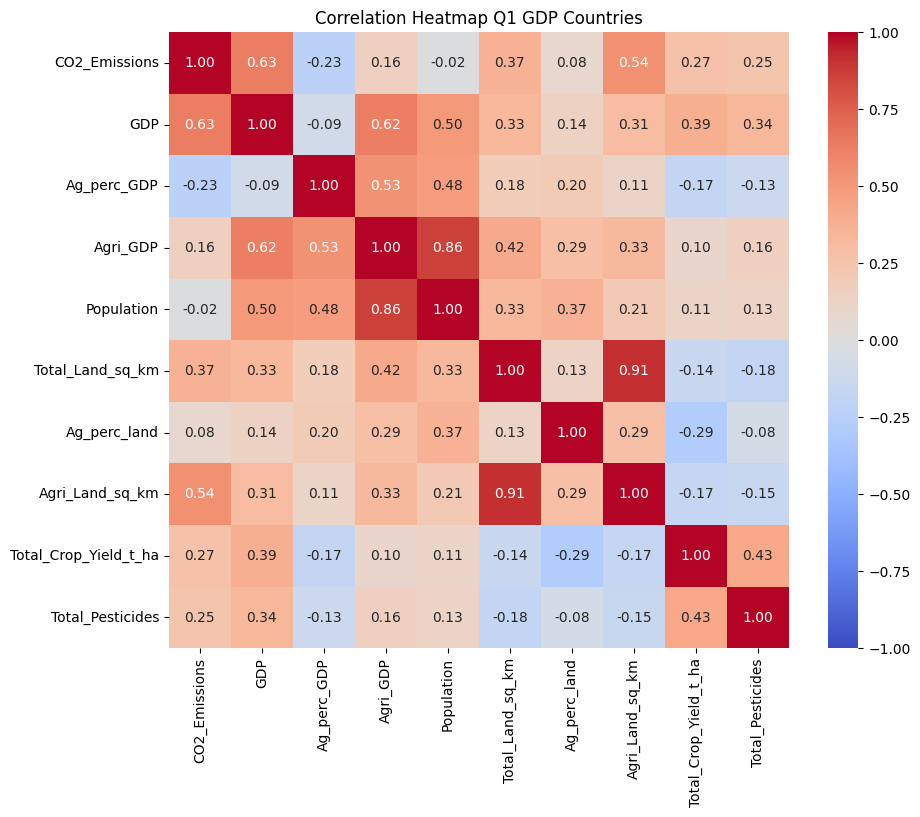

In [101]:
#Attempt to make correlation_matrix with GDP partitions
#Matrix created using altered data from complete_df: Q1 GDP
corr_matrix_q1_df = ep_q1_df.drop(columns = ['Code', 'Year', 'Country', 'Quartile'])
corr_matrix_q1_df

corr_mat = corr_matrix_q1_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap Q1 GDP Countries')
plt.show()

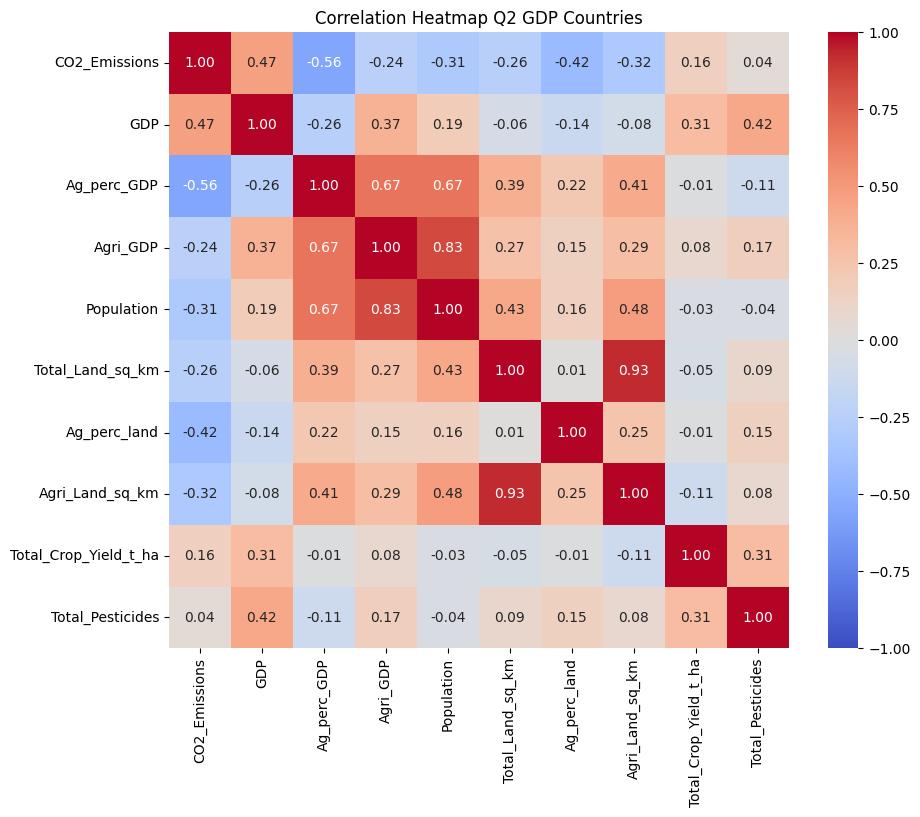

In [102]:
#Attempt to make correlation_matrix with GDP partitions
#Matrix created using altered data from complete_df: Q2 GDP
corr_matrix_q2_df = ep_q2_df.drop(columns = ['Code', 'Year', 'Country', 'Quartile'])
corr_matrix_q2_df

corr_mat = corr_matrix_q2_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap Q2 GDP Countries')
plt.show()

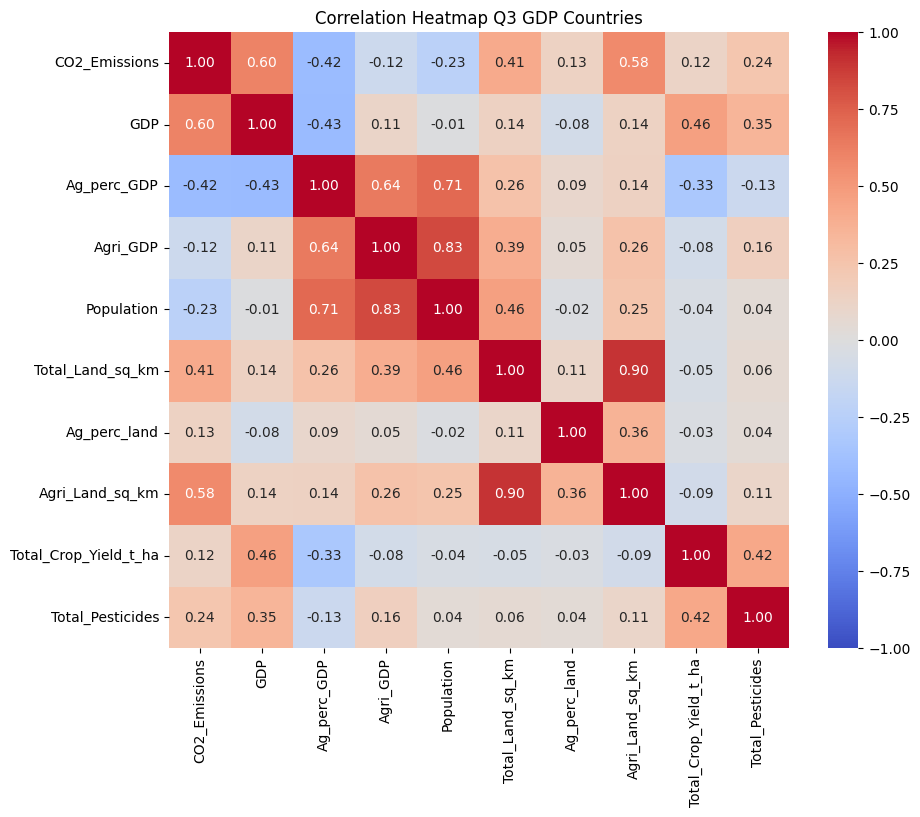

In [103]:
#Attempt to make correlation_matrix with GDP partitions
#Matrix created using altered data from complete_df: Q2 GDP
corr_matrix_q3_df = ep_q3_df.drop(columns = ['Code', 'Year', 'Country', 'Quartile'])
corr_matrix_q3_df

corr_mat = corr_matrix_q3_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap Q3 GDP Countries')
plt.show()

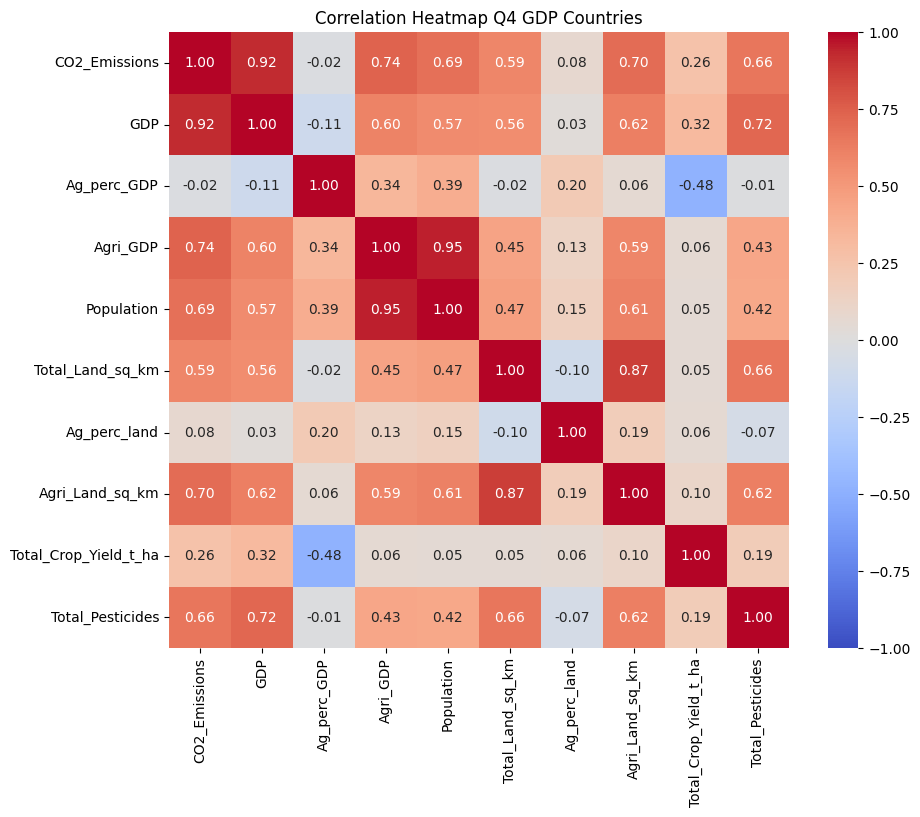

In [120]:
#Attempt to make correlation_matrix with GDP partitions
#Matrix created using altered data from complete_df: Q2 GDP
corr_matrix_q4_df = ep_q4_df.drop(columns = ['Code', 'Year', 'Country', 'Quartile'])
corr_matrix_q4_df

corr_mat = corr_matrix_q4_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap Q4 GDP Countries')
plt.show()

In [ ]:
#Scatter plot of with q1 co2
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
# ep_q1_df.drop(columns = ['Z-Score','Is-Outlier'])
plot_scatter(ep_q1_df, 'CO2_Emissions', column_test)

In [ ]:
#Scatter plot of with q2 co2
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
# ep_q1_df.drop(columns = ['Z-Score','Is-Outlier'])
plot_scatter(ep_q2_df, 'CO2_Emissions', column_test)

In [ ]:
#Scatter plot of agricultural land versus features
column_test = ['CO2_Emissions', 'Ag_perc_GDP', 'GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
outlier_cleaved_superpowers_df.drop(columns = ['Z-Score','Is-Outlier'])
plot_scatter(outlier_cleaved_superpowers_df, 'CO2_Emissions', column_test)

In [159]:
# Exporting necessary files for interactive dashboard
complete_df.to_csv('complete_e.csv',index =False)
outlier_cleaved_superpowers_df.to_csv('outlier_e.csv', index=False)
ep_q1_df.to_csv('q1_e.csv', index=False)
ep_q2_df.to_csv('q2_e.csv', index=False)
ep_q3_df.to_csv('q3_e.csv', index=False)
ep_q4_df.to_csv('q4_e.csv', index=False)




In [160]:
ep_q1_df

Code              Country  Year  CO2_Emissions           GDP  \
70    ATG  Antigua and Barbuda  1990     210.000000  8.447089e+08   
71    ATG  Antigua and Barbuda  1991     220.000000  8.354738e+08   
72    ATG  Antigua and Barbuda  1992     290.000000  8.357832e+08   
73    ATG  Antigua and Barbuda  1993     250.000000  8.566738e+08   
74    ATG  Antigua and Barbuda  1994     250.000000  9.376858e+08   
...   ...                  ...   ...            ...           ...   
3649  TGO                 Togo  2014    1590.000033  1.252721e+10   
3650  TGO                 Togo  2015    1830.000043  1.418987e+10   
3651  TGO                 Togo  2016    2299.999952  1.535744e+10   
3652  TGO                 Togo  2017    2069.999933  1.579479e+10   
3653  TGO                 Togo  2019    2369.999886  1.806592e+10   

      Ag_perc_GDP      Agri_GDP  Population  Total_Land_sq_km  Ag_perc_land  \
70       0.017806  1.504117e+07       63087             440.0     20.454545   
71       0.017799  1.487088e+07       63406             440.0     20.454545   
72       0.018026  1.506575e+07       64421             440.0     20.454545   
73       0.017454  1.495208e+07       65600             440.0     20.454545   
74       0.015765  1.478299e+07       66860             440.0     20.454545   
...           ...           ...         ...               ...           ...   
3649     0.193388  2.422618e+09     7472458           54390.0     70.233499   
3650     0.189219  2.684988e+09     7663199           54390.0     70.233499   
3651     0.203851  3.130627e+09     7858297           54390.0     70.233499   
3652     0.203156  3.208800e+09     8057139           54390.0     70.233499   
3653     0.195146  3.525490e+09     8463068           54390.0     70.233499   

      Agri_Land_sq_km  Total_Crop_Yield_t_ha  Total_Pesticides Quartile  \
70             9000.0             166.635398            289.45       Q1   
71             9000.0             164.248498            289.45       Q1   
72             9000.0             167.128795            289.45       Q1   
73             9000.0             163.675597            289.45       Q1   
74             9000.0             161.764396            289.45       Q1   
...               ...                    ...               ...      ...   
3649        3820000.0             323.226399            812.89       Q1   
3650        3820000.0             325.309397           1117.98       Q1   
3651        3820000.0             326.060798           1246.20       Q1   
3652        3820000.0             326.541497           1263.00       Q1   
3653        3820000.0             326.630596           1425.00       Q1   

       Z-Score  Is-Outlier  
70   -0.631911       False  
71   -0.628513       False  
72   -0.604726       False  
73   -0.618319       False  
74   -0.618319       False  
...        ...         ...  
3649 -0.162963       False  
3650 -0.081407       False  
3651  0.078307       False  
3652  0.000149       False  
3653  0.102094       False  

[1003 rows x 16 columns]